In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as pltax
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import math
import os
import pandas as pd
import statistics as stat
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
plt.rcParams.update({"text.usetex":True})
%matplotlib inline

In [2]:
plt.rcdefaults()
font={'family':'Times New Roman',
        'weight':'bold',
        'size':18}
matplotlib.rc('font',**font)
matplotlib.rc('xtick',labelsize=14) 
matplotlib.rc('ytick',labelsize=14)

In [3]:
#block from https://stackoverflow.com/questions/58108964/how-to-open-multiple-files-in-loop-in-python
folderpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Photometry_Initial" # make sure to put the 'r' in front
filepaths =[os.path.join(folderpath,name) for name in os.listdir(folderpath)]
files=[]
filenames=[]

for path in filepaths:
    with open(path,'r') as f:
        #name list=filenames
        filename=str(f)
        filename=filename.lstrip("<_io.TextIOWrapper name='C:\\\\Users\\\\oh0si\\\\OneDrive\\\\Documents\\\\Summer_Internship_2021\\\\")
        filename=filename.lstrip("Photometry_Initial")
        filename=filename.lstrip("\\\\")                #strip function was being annoying and sometimes removing letters at the beginning of the filename so I had to split up the strips
        filename=filename.rstrip("' mode='r' encoding='cp1252'>")
        filenames.append(filename)
        #data list=files
        file=np.loadtxt(path,skiprows=4,dtype=str,unpack=True)
        files.append(file)

In [4]:
#block from https://stackoverflow.com/questions/58108964/how-to-open-multiple-files-in-loop-in-python
folderpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\AAVSO_Photometry_clean" # make sure to put the 'r' in front
filepaths=[os.path.join(folderpath,name) for name in os.listdir(folderpath)]
AAVSOfiles=[]
AAVSOfilenames=[]

for path in filepaths:
    with open(path,'r') as f:
        #name list=filenames
        filename=str(f)
        filename=filename.lstrip("<_io.TextIOWrapper name='C:\\\\Users\\\\oh0si\\\\OneDrive\\\\Documents\\\\Summer_Internship_2021\\\\")
        filename=filename.lstrip("AAVSO_Photometry_clean")
        filename=filename.lstrip("\\\\")                #strip function was being annoying and sometimes removing letters at the beginning of the filename so I had to split up the strips
        filename=filename.rstrip("' mode='r' encoding='cp1252'>")
        AAVSOfilenames.append(filename)
        #data list=files
        file=np.loadtxt(path,dtype=object,delimiter=',',unpack=True)
        AAVSOfiles.append(file)

In [5]:
eruption_dates=pd.read_csv("nova_t0.csv")
eruption_dates_arr=np.array(eruption_dates['t_0'])
#date_diff=eruption_dates_arr - 2450000
names_arr=np.array(eruption_dates['Name'])
filenames_arr=np.array(eruption_dates['FileName'])

In [6]:
#-3 is n/a, -2 is bad data, -1 is unsure, 0 is none, 1 is IR excess, 2 is dust dip
Decent_Dust=pd.read_csv("Decent_Lightcurves_Chart_Final.csv")
Decent_Dust_Names=np.array(Decent_Dust["Name"])
Decent_Dust_geq_20=np.array(Decent_Dust["geq_20"])
Decent_Dust_Hard_Mask=np.array(Decent_Dust["Hard_Mask"])
Decent_Dust_Elias_Mask=np.array(Decent_Dust["Elias_Mask"])
Decent_Dust_chunksize=np.array(Decent_Dust["chunksize"])
Decent_Dust_xlim_1=np.array(Decent_Dust["xlim_1"])
Decent_Dust_xlim_2=np.array(Decent_Dust["xlim_2"])
Decent_Dust_decline_start=np.array(Decent_Dust["decline_start"])
Decent_Dust_recover_end=np.array(Decent_Dust["recover_end"])
Decent_Dust_recurrent=np.array(Decent_Dust["Recurrent"])
Decent_Dust_giant=np.array(Decent_Dust["Giant"])
Decent_Dust_category=np.array(Decent_Dust["category"])
Decent_Dust_official=np.array(Decent_Dust["Official"])
print("There are",np.size(Decent_Dust_geq_20),"novae in total that have photometry files.")
print(np.size(np.where(Decent_Dust_geq_20==1)[0]),"novae have at least 20 measurements each for the V and K bands.")
print(np.size(np.where(Decent_Dust_category==-1)[0])+np.size(np.where(Decent_Dust_category==0)[0])+np.size(np.where(Decent_Dust_category==1)[0])+np.size(np.where(Decent_Dust_category==2)[0]),"novae have usable data.")
print(np.size(np.where(Decent_Dust_category==1)[0])+np.size(np.where(Decent_Dust_category==2)[0]),"novae with decent data have a dust dip.")

There are 93 novae in total that have photometry files.
76 novae have at least 20 measurements each for the V and K bands.
40 novae have usable data.
19 novae with decent data have a dust dip.


In [7]:
# PeakFrame nova ordering is the same as Decent_Dust.
Peak_In_Lit=pd.read_csv("Peak_in_Literature_Final.csv",delimiter=',',skiprows=0,header=0,index_col=0,usecols=np.arange(0,35,1,dtype=int))
Peak_In_Lit.loc[:,'tmax err +':'tmax err -']=np.asarray(Peak_In_Lit.loc[:,'tmax err +':'tmax err -'].fillna(0))
cleanframe=pd.DataFrame.dropna(Peak_In_Lit.loc[:,['K date - tmax','tmax err +','tmax err -','Extinction Corrected V-K Color','Extinction Corrected Uncertainty','V0']])
Kdatetmaxdiff=np.array(cleanframe.loc[:,'K date - tmax'])
Kdatetmaxdifferr=np.transpose(np.array(cleanframe.loc[:,'tmax err +':'tmax err -']))
correctedVK=np.array(cleanframe.loc[:,'Extinction Corrected V-K Color'])
correctedVKerr=np.array(cleanframe.loc[:,'Extinction Corrected Uncertainty'])
v0=np.array(cleanframe.loc[:,'V0'])

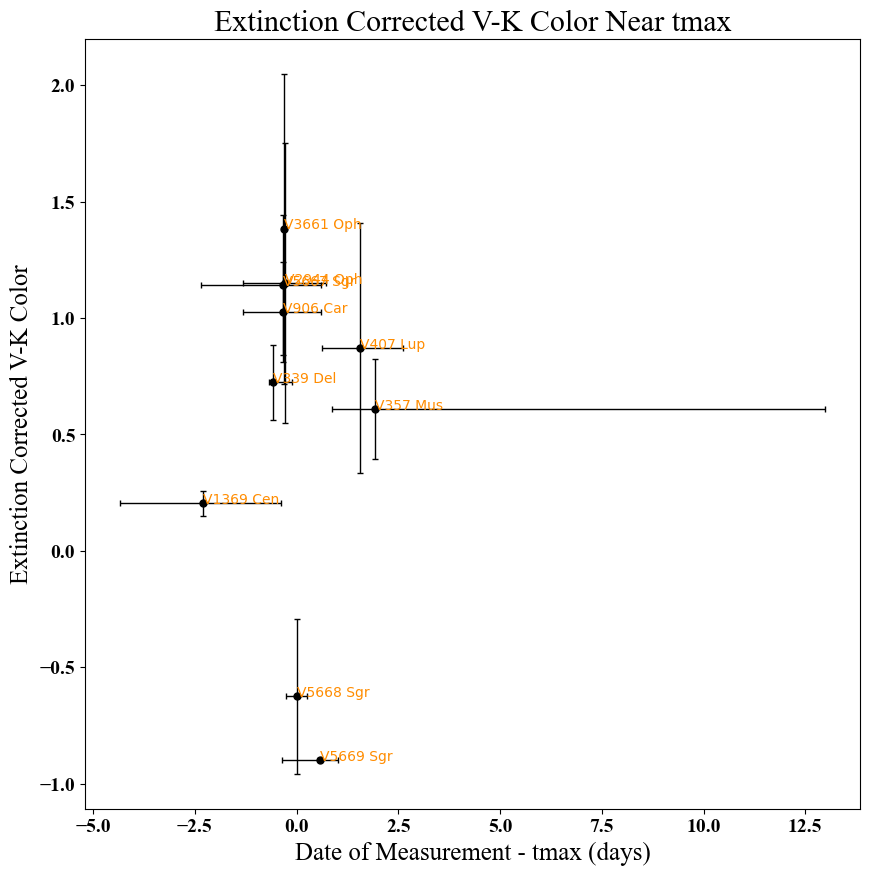

In [8]:
plt.figure(1,figsize=(10,10))
plt.errorbar(Kdatetmaxdiff,correctedVK,xerr=Kdatetmaxdifferr,yerr=correctedVKerr,lw=0,marker='o',markersize=5,elinewidth=1,c='k',capsize=2)
plt.title('Extinction Corrected V-K Color Near tmax')
plt.ylabel('Extinction Corrected V-K Color')
plt.xlabel('Date of Measurement - tmax (days)')
for i,txt in enumerate(np.array(cleanframe.index)):
    plt.annotate(txt,(Kdatetmaxdiff[i],correctedVK[i]),font={'family':'DejaVu Sans','weight':'normal','size':10},color='darkorange')
#plt.savefig('ExtCorrectVKvsttmaxdiff.pdf',transparent=False)

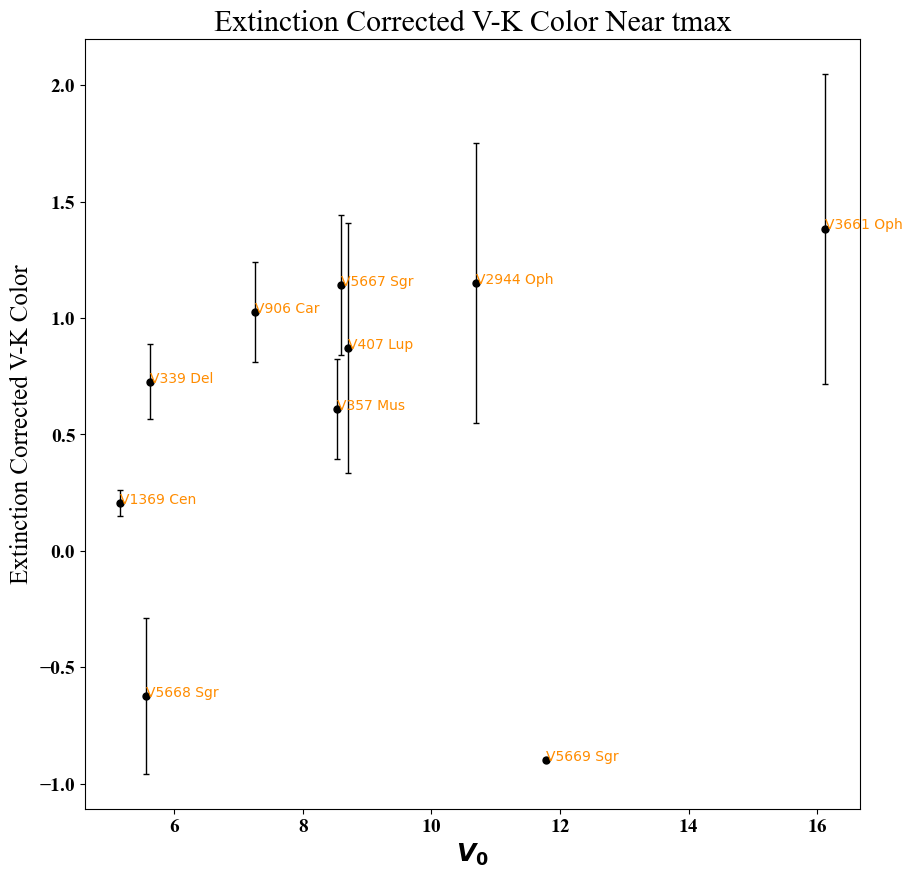

In [9]:
plt.figure(2,figsize=(10,10))
plt.errorbar(v0,correctedVK,yerr=correctedVKerr,lw=0,marker='o',markersize=5,elinewidth=1,c='k',capsize=2)
plt.title('Extinction Corrected V-K Color Near tmax')
plt.ylabel('Extinction Corrected V-K Color')
plt.xlabel(r'$V_0$')
for i,txt in enumerate(np.array(cleanframe.index)):
    plt.annotate(txt,(v0[i],correctedVK[i]),font={'family':'DejaVu Sans','weight':'normal','size':10},color='darkorange')
#plt.savefig('ExtCorrectVKvsV0.pdf',transparent=False)

In [10]:
meanpeakVK,meanpeakVK1sig=np.mean(correctedVK),np.std(correctedVK)
weightavgpeakVK=np.average(correctedVK,weights=5-np.abs(Kdatetmaxdiff))
weightstdev=np.sqrt(np.cov(correctedVK, aweights=5-np.abs(Kdatetmaxdiff)))

In [11]:
Elias_t2_df=pd.read_csv('Elias_t2.csv')
t2arr_floatcheck=np.transpose(np.array(Elias_t2_df.iloc[:,0:3]))

Elias_t2_arr=[]
for i in t2arr_floatcheck[2]:
    try:
        float(i)
    except ValueError:
        Elias_t2_arr.append(np.NaN)
    else:
        Elias_t2_arr.append(float(i))
Elias_t2_arr=np.array([t2arr_floatcheck[1],Elias_t2_arr])
t2_arr=np.array(Elias_t2_arr[1],dtype=float)
Elias_t2_start_arr=np.array(Elias_t2_df.iloc[:,5])
Elias_t2_end_arr=np.array(Elias_t2_df.iloc[:,6])

In [12]:
t2_dustduration_na=pd.read_csv('Observations.csv')
t2_dustduration=t2_dustduration_na.dropna()

In [13]:
t2_dustduration_names=np.array(t2_dustduration.iloc[:,0])
t2_dustduration_dur=np.array(t2_dustduration.iloc[:,2])-np.array(t2_dustduration.iloc[:,1])

In [14]:
nacount=0
baddatacount=0
unsurecount=0
nonecount=0
irexcesscount=0
dustdipcount=0
for ii in Decent_Dust_category:
    if ii==-3:
        nacount+=1
    if ii==-2:
        baddatacount+=1
    if ii==-1:
        unsurecount+=1
    if ii==0:
        nonecount+=1
    if ii==1:
        irexcesscount+=1
    if ii==2:
        dustdipcount+=1
print(nacount,baddatacount,unsurecount,nonecount,irexcesscount,dustdipcount)

15 38 7 14 3 16


In [15]:
#dataframe dump
features=pd.DataFrame(Decent_Dust_geq_20,index=Decent_Dust_Names,columns=['geq_20'])
header_list=['geq_20','mag_range','biggest_change','color_change_from_vmax','day_change_from_vmax',
             'recurrent','category','vband_change_over_interval','kband_change_over_interval','Vpeak','t2','peak_dt','peak_dm','peak_dm_err','peakColor','upper','lower','start','start_err+','start_err-','bottom','bottom_err+','bottom_err-']
features=features.reindex(columns=header_list)
features['recurrent']=Decent_Dust_recurrent
features['category']=Decent_Dust_category
features['t2']=t2_arr
features['biggest_change']=0.0
features['Vpeak']=0.0
features['peakColor']="None"
features['start']=0.0
features['start_err+']=0.0
features['start_err-']=0.0
features['bottom']=0.0
features['bottom_err+']=0.0
features['bottom_err-']=0.0

In [16]:
Decent_Dust_official_underscored_l=[]
for obj in Decent_Dust_official:
    Decent_Dust_official_underscored_l.append(obj.replace(' ','_')+'.txt')
Decent_Dust_official_underscored=np.array(Decent_Dust_official_underscored_l,dtype=object)
AAVSOfilenames_indexlist=[]
for i in range(len(AAVSOfilenames)):
    AAVSOfilenames_indexlist.append(np.where(Decent_Dust_official_underscored==AAVSOfilenames[i])[0][0])
AAVSOfilenames_indexarr=np.array(AAVSOfilenames_indexlist)

In [17]:
def Color(xlist1,xlist2,ylist1,ylist2,else_xlist=[],else_ylist=[]):
    if len(xlist1)>1 and len(xlist2)>1:
        #Color
        first1=int(xlist1[0])
        last1=int(xlist1[-1])
        first2=int(xlist2[0])
        last2=int(xlist2[-1])
        if first1<first2:  #the first day to check will be the later of the two,as only when both start can there be overlap
            first=first2
        else:
            first=first1
        if last1>last2:    #the last day will be the first of the two,as the con only overlap when both are being measured
            last=last2
        else:
            last=last1      
        daylist1=[]                #list of the days for which there are measurements of the K band
        xmeanlist1=[]           #list of the mean dates in the K band bins
        ymeanlist1=[]            #list of the mean mags in the K band bins
        x_arr1=np.array(xlist1)   #K band date array to use numpy with
        if(last>0):
            rangemod=1
        elif(last<0):
            rangemod=-1
        else:
            rangemod='0'
        for curr_val in range(first,last+rangemod):  #for dates when both bands might be being measured
            ind_right_side1=np.where(curr_val<=x_arr1)[0] #the right side indices include everything on that day and forward
            ind_left_side1=np.where(curr_val+1>x_arr1)[0] #the left side indices include everything before the next day
            ind_left_end1=ind_right_side1[0] #the left end is the leftmost value on the right side array
            ind_right_end1=ind_left_side1[-1]#[np.size(ind_left_side1)-1] #the right end is the rightmost value on the left side array
            if ind_left_end1<=ind_right_end1: #if the left end coincides with or is to the left of the right end
                ind_full1=np.arange(ind_left_end1,ind_right_end1+1) #list of indices in Kdate that fall within the 1-day range ahead of curr_date
                tempxsumlist1=[] #temporary date list
                tempysumlist1=[] #temporary mag list 
                for ii in ind_full1: #for indices in the list of dates during that day
                    tempxsumlist1.append(xlist1[ii])
                    tempysumlist1.append(ylist1[ii])
                xmean1=stat.mean(tempxsumlist1)
                ymean1=stat.mean(tempysumlist1)
                daylist1.append(curr_val)
                xmeanlist1.append(xmean1)
                ymeanlist1.append(ymean1)
        daylist2=[]
        xmeanlist2=[]
        ymeanlist2=[]
        x_arr2=np.array(xlist2)
        for curr_val in range(first,last+rangemod):
            ind_right_side2=np.where(curr_val<=x_arr2)[0]
            ind_left_side2=np.where(curr_val+1>x_arr2)[0]
            ind_left_end2=ind_right_side2[0]
            ind_right_end2=ind_left_side2[-1]#[np.size(ind_left_side2)-1]
            if ind_left_end2<=ind_right_end2:
                ind_full2=np.arange(ind_left_end2,ind_right_end2+1) #list of indices in Vdate that fall within the 1-day range ahead of curr_date
                tempxsumlist2=[]
                tempysumlist2=[]
                for ii in ind_full2:
                    tempxsumlist2.append(xlist2[ii])
                    tempysumlist2.append(ylist2[ii])
                xmean2=stat.mean(tempxsumlist2)
                ymean2=stat.mean(tempysumlist2)
                daylist2.append(curr_val)
                xmeanlist2.append(xmean2)
                ymeanlist2.append(ymean2)
        #find where points exist for both K and V
        daylist=[]
        daylist_arr2=np.array(daylist2)
        for day1 in daylist1:
            overlap_bool_arr=np.where(daylist_arr2==day1)[0]
            if np.size(overlap_bool_arr)==1:
                daylist.append(day1)
        #combine into final color array
        y_list=[]
        daylist_arr1=np.array(daylist1)
        for day in daylist: #for the overlap days (when there is a datapoint during that day for dust dip K and V bands)
            y_list.append(ymeanlist2[int(np.where(daylist_arr2==day)[0][0])]-ymeanlist1[int(np.where(daylist_arr1==day)[0][0])])
    else:
        daylist=else_xlist
        y_list=else_ylist
    return daylist,y_list
def shortenlist(list1,list2,start,end):
    short_list1=[]
    short_list2=[]
    for i,aa in enumerate(list1):
        if aa>=start and aa<=end:
            short_list1.append(aa)
            short_list2.append(list2[i])
    return short_list1,short_list2
def findchange(xlist,ylist,distance=250,radius=250):
    changelist=[]
    xpointlist,ypointlist=[],[]
    for i,x in enumerate(xlist):
        short_x,short_y=shortenlist(xlist,ylist,x+distance-radius,x+distance+radius)
        if len(short_y)>=1:
            changelist.append((-1*(np.asarray(short_y)-ylist[i]))[(np.argmax(abs(np.asarray(short_y)-ylist[i])))])
            xpointlist.append([x,short_x[np.argmax(abs(np.asarray(short_y)-ylist[i]))]])
            ypointlist.append([ylist[i],short_y[np.argmax(abs(np.asarray(short_y)-ylist[i]))]])
        else:
            pass
    if len(changelist)>=1:
        plotpoints1,plotpoints2=xpointlist[np.argmax(abs(np.asarray(changelist)))],ypointlist[np.argmax(abs(np.asarray(changelist)))]
    if len(changelist)>=1:
        return changelist[np.argmax(abs(np.asarray(changelist)))],plotpoints1,plotpoints2
    else:
        return "No compatible points. (change)"
def name_translator(in_name):
    pairsarr=np.transpose(np.array(Decent_Dust.loc[:,["Name","Official"]]))
    if len(np.where(pairsarr[0]==in_name)[0])>0:
        return pairsarr[1,np.where(pairsarr[0]==in_name)[0][0]]
    elif len(np.where(pairsarr[1]==in_name)[0])>0:
        return pairsarr[0,np.where(pairsarr[1]==in_name)[0][0]]
    else:
        return in_name+' no match'
def vt2dusttest(xarr,yarr,t2):
    return t2,(yarr[np.argmin(xarr-t2)]-np.max(yarr))/(-xarr[np.argmin(xarr-t2)]+xarr[np.argmax(yarr)])
def removebounds(date,mag,err,sat,dim): #returns date and mag (input as a lists) with sat and dim removed, where sat and dim are arrays of indices.
    return list(np.delete(np.asarray(date),np.append(sat,dim))),list(np.delete(np.asarray(mag),np.append(sat,dim))),list(np.delete(np.asarray(err),np.append(sat,dim)))
def combinesource(date1,mag1,err1,date2,mag2,err2): #inputs and outputs are lists
    date12unsort=np.array(date1+date2)
    mag12unsort=np.array(mag1+mag2)
    err12unsort=np.array(err1+err2)
    comsort=np.argsort(date12unsort)
    return list(date12unsort[comsort]),list(mag12unsort[comsort]),list(err12unsort[comsort])


In [18]:
Decent_Dust_index_list=[]
nova_t0_index_list=[]
Kdate_list=[]
Kmag_list=[]
Kerror_list=[]
Vdate_list=[]
Vmag_list=[]
Verror_list=[]
KV_daylist_list=[]
KV_maglist_list=[]
len_KV_daylist365_list=[]
v2dusttest1=[]
v2dusttest2=[]
v2dusttestnames=[]
Vsatlist=[]
Vdimlist=[]
Ksatlist=[]
Kdimlist=[]
Kbandname='K band'
Kcolor='k'
Vbandname='V band'
Vcolor='lime'
KVcolor='k'
KVlabel='V-K color'
aavsoVcolor='greenyellow'
aavsoVlabel='AAVSO V band'
aavsoCVcolor='yellowgreen'
aavsoCVlabel='AAVSO CV band'
tmax0list=[]

In [19]:
for file_num in range(int(len(files)/2)):

    #declare files to be indexed
    file1=files[file_num*2]
    filename1=filenames[file_num*2]
    file2=files[file_num*2+1]
    filename2=filenames[file_num*2+1]

    #find t_0
    nova_t0_index=int(np.where(filenames_arr==filename1)[0][0])
    t0_JD=eruption_dates_arr[nova_t0_index]
    t0=t0_JD - 2450000.0

    #filter with "Decent_Lightcurves_Chart.csv"
    Decent_Dust_index=int(np.where(Decent_Dust_Names==names_arr[nova_t0_index])[0][0])

    #AAVSO data
    if len(np.where(AAVSOfilenames_indexarr==Decent_Dust_index)[0])==1:
        AAVSOfilepresent=True
        AAVSOfile=AAVSOfiles[np.where(AAVSOfilenames_indexarr==Decent_Dust_index)[0][0]]
        AAVSOdate,AAVSOmag,AAVSOerr,AAVSOband=AAVSOfile
    else:
        AAVSOfilepresent=False
    AAVSOfilepresent=False
    
    if Decent_Dust_geq_20[Decent_Dust_index]==1:
        if np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index]==np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index]:
            tmax_JD=float(np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index])
            tmax0=tmax_JD-t0_JD
            print(Decent_Dust_Names[Decent_Dust_index],tmax0)
            tmax0list.append(tmax0)
        else:
            tmax0list.append(0.0)
        #first file (ir)
        #variables,convert strings to floats (where applicable)
        date1=np.array(file1[0],dtype=float)
        band1=file1[1]
        mag1=np.array(file1[2],dtype=float)
        err1=np.array(file1[3],dtype=float)
        Kbandfilter=np.bitwise_and(np.where(band1=='K',True,False),np.where(err1<0.5,True,False))
        Kdate=list(date1[Kbandfilter]-t0)
        Kmag=list(mag1[Kbandfilter])
        Kerror=list(err1[Kbandfilter])
        #second file (opt)
        date2=np.array(file2[0],dtype=float)
        band2=file2[1]
        mag2=np.array(file2[2],dtype=float)
        err2=np.array(file2[3],dtype=float)
        Vbandfilter=np.bitwise_and(np.where(band2=='V',True,False),np.where(err2<0.5,True,False))
        Vdate=list(date2[Vbandfilter]-t0)
        Vmag=list(mag2[Vbandfilter])
        Verror=list(err2[Vbandfilter])
        if AAVSOfilepresent==True:
            #AAVSO data
            date_nomaskaavso=[]
            aavsoVdate,aavsoCVdate=[],[]
            for no in AAVSOdate:
                date_nomaskaavso.append(float(no))
            mag_nomaskaavso=[]
            aavsoVmag,aavsoCVmag=[],[]
            for no in AAVSOmag:
                no=no.lstrip('<>')
                mag_nomaskaavso.append(float(no))
            error_nomaskaavso=[]
            aavsoVerror,aavsoCVerror=[],[]
            for no in AAVSOerr:
                if len(no)==0:
                    no=0
                error_nomaskaavso.append(float(no))
            #AAVSO mask
            AAVSO_V_arr=np.where(AAVSOband=='V')[0]
            for ii in AAVSO_V_arr:
                aavsoVdate.append(date_nomaskaavso[ii] - t0)
                aavsoVmag.append(mag_nomaskaavso[ii])
                aavsoVerror.append(error_nomaskaavso[ii])
            poplist=np.where(np.asarray(Verror)>=0.5)[0]
            for i,ii in enumerate(poplist):
                aavsoVdate.pop(ii-i)
                aavsoVmag.pop(ii-i)
                aavsoVerror.pop(ii-i)
            AAVSO_CV_arr=np.where(AAVSOband=='CV')[0]
            for ii in AAVSO_CV_arr:
                aavsoCVdate.append(date_nomaskaavso[ii] - t0)
                aavsoCVmag.append(mag_nomaskaavso[ii])
                aavsoCVerror.append(error_nomaskaavso[ii])
            poplist=np.where(np.asarray(aavsoCVerror)>=0.5)[0]
            for i,ii in enumerate(poplist):
                aavsoCVdate.pop(ii-i)
                aavsoCVmag.pop(ii-i)
                aavsoCVerror.pop(ii-i)
            aavsoVdate=list(np.array(aavsoVdate)-2450000)
            aavsoCVdate=list(np.array(aavsoCVdate)-2450000)
            Vdate,Vmag,Verror=combinesource(Vdate,Vmag,Verror,aavsoVdate,aavsoVmag,aavsoVerror)
            
        #get lower and upper limit arrays for V and K and squeeze mags to between 5 and 20.
        Vsat=np.where(np.asarray(Vmag)<=5)[0]
        #Vsatdate=np.asarray(Vdate)[Vsat]
        for i in Vsat:
            Vmag[i]=5
        Vdim=np.where(np.asarray(Vmag)>=20)[0]
        #Vdimdate=np.asarray(Vdate)[Vdim]
        for i in Vdim:
            Vmag[i]=20

        Ksat=np.where(np.asarray(Kmag)<=5)[0]
        #Ksatdate=np.asarray(Kdate)[Ksat]
        for i in Ksat:
            Kmag[i]=5
        Kdim=np.where(np.asarray(Kmag)>=20)[0]
        #Kdimdate=np.asarray(Kdate)[Kdim]
        for i in Kdim:
            Kmag[i]=20
        
        #colors
        KV_daylist,KV_maglist=Color(Kdate,Vdate,Kmag,Vmag)
               
        #shorter color arrays for curve fitting // split at minimum
        KV_decline_start=Decent_Dust_decline_start[Decent_Dust_index]
        KV_recover_end=Decent_Dust_recover_end[Decent_Dust_index]
        startholder=KV_daylist[0]
        KV_daylist365,KV_maglist365=shortenlist(KV_daylist,KV_maglist,startholder,365)
        if KV_daylist365[-1]<KV_recover_end:
            KV_recover_end=KV_daylist365[-1]
        if KV_daylist365[0]>KV_decline_start:
            KV_decline_start=KV_daylist365[0]
        minimum=KV_daylist365[np.argmax(np.asarray(KV_daylist365))]
        features.loc[Decent_Dust_Names[Decent_Dust_index],'biggest_change']=findchange(KV_daylist365,KV_maglist365)[0]
        
        magrange_comp=5
        top,bottom=np.percentile(KV_maglist365,[magrange_comp,100-magrange_comp])
        features.loc[Decent_Dust_Names[Decent_Dust_index],'mag_range']=(bottom-top)
        
        Vdate50,Vmag50=shortenlist(Vdate,Vmag,0,50)
        if len(Vmag50)>=1:
            Vpeak=np.max(Vmag50)
        else:
            Vpeak=np.nan
        features.loc[Decent_Dust_Names[Decent_Dust_index],'Vpeak']=Vpeak
            
        #finding greatest change in v-k color from max in V band
        outlier_ind_list=[]
        for i,mag in enumerate(Vmag):
            if len(np.where((np.abs(np.asarray(Vmag)-mag))<1)[0])<1:
                outlier_ind_list.append(i)
        Vmag_nooutliers=np.delete(np.asarray(Vmag),outlier_ind_list)
        Vdate_nooutliers=np.delete(np.asarray(Vdate),outlier_ind_list)
        Vmag_before500=(np.where(Vdate_nooutliers<365)[0])[-1]
        Vmag_before500list=Vmag_nooutliers[:Vmag_before500]
        if len(Vmag_before500list)>0:
            Vmaxdate=Vdate_nooutliers[np.argmin(Vmag_before500list)]
        else:
            Vmaxdate=0
        outlier_ind_list=[]
        for i,mag in enumerate(KV_maglist365):
            if len(np.where((np.abs(np.asarray(KV_maglist365)-mag))<1)[0])<1:
                outlier_ind_list.append(i)
        KV_daylist365_nooutliers=np.delete(np.asarray(KV_daylist365),outlier_ind_list)
        KV_maglist365_nooutliers=np.delete(np.asarray(KV_maglist365),outlier_ind_list)
        KVclosest=np.argmin(np.abs(np.asarray(KV_daylist365_nooutliers)-Vmaxdate))
        KVfurthest=np.argmax(np.asarray(KV_maglist365_nooutliers)[KVclosest:])+KVclosest
        day_change_from_max=KV_daylist365_nooutliers[KVfurthest]-KV_daylist365_nooutliers[KVclosest]
        mag_change_from_max=KV_maglist365_nooutliers[KVfurthest]-KV_maglist365_nooutliers[KVclosest]
        features.loc[Decent_Dust_Names[Decent_Dust_index],'color_change_from_vmax']=mag_change_from_max
        features.loc[Decent_Dust_Names[Decent_Dust_index],'day_change_from_vmax']=day_change_from_max
        #data to change symbol in main plot for saturation at peak/non detection at bottom
        if (np.argmin(np.abs(np.asarray(Kdate)-KV_daylist365_nooutliers[KVclosest])) in Ksat) or (np.argmin(np.abs(np.asarray(Vdate)-KV_daylist365_nooutliers[KVclosest])) in Vdim):
            features.loc[Decent_Dust_Names[Decent_Dust_index],'upper']=1
        if (np.argmin(np.abs(np.asarray(Vdate)-KV_daylist365_nooutliers[KVfurthest])) in Vdim) or (np.argmin(np.abs(np.asarray(Kdate)-KV_daylist365_nooutliers[KVfurthest])) in Ksat):
            features.loc[Decent_Dust_Names[Decent_Dust_index],'lower']=1
        #greatest color change from tmax
        if np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index]==np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index]:
            tmax=float(np.asarray(Peak_In_Lit.loc[:,"tmax"])[Decent_Dust_index])
            peakKdate=np.asarray(Peak_In_Lit.loc[:,"K date"])[Decent_Dust_index]
        else:
            tmax=0
        if np.asarray(Peak_In_Lit.loc[:,"Extinction Corrected V-K Color"])[Decent_Dust_index]==np.asarray(Peak_In_Lit.loc[:,"Extinction Corrected V-K Color"])[Decent_Dust_index]:
            peakColor="Full"
            KVpeak=np.asarray(Peak_In_Lit.loc[:,"Extinction Corrected V-K Color"])[Decent_Dust_index]
            A_V=np.asarray(Peak_In_Lit.loc[:,"Extinction(A_v)"])[Decent_Dust_index]
            A_V_err=np.asarray(Peak_In_Lit.loc[:,"A_v Uncertainty"])[Decent_Dust_index]
            if A_V_err>0:
                pass
            else:
                A_V_err=0
            A_K=np.asarray(Peak_In_Lit.loc[:,"Extinction(A_k)"])[Decent_Dust_index]
            A_K_err=np.asarray(Peak_In_Lit.loc[:,"A_k Uncertainty"])[Decent_Dust_index]
            CorrectedVKarr=KV_maglist365_nooutliers-A_V+A_K
            diffpeakind=np.argmax(CorrectedVKarr-KVpeak)
            peak_dt=KV_daylist365_nooutliers[diffpeakind]+t0_JD-peakKdate
            peak_dm=CorrectedVKarr[diffpeakind]-KVpeak
            peak_dm_err=A_V_err+A_K_err
        elif tmax!=0 and np.asarray(Peak_In_Lit.loc[:,"Extinction(A_v)"])[Decent_Dust_index]==np.asarray(Peak_In_Lit.loc[:,"Extinction(A_v)"])[Decent_Dust_index]:
            peakColor="Extinction"
            A_V=np.asarray(Peak_In_Lit.loc[:,"Extinction(A_v)"])[Decent_Dust_index]
            A_V_err=np.asarray(Peak_In_Lit.loc[:,"A_v Uncertainty"])[Decent_Dust_index]
            A_K=np.asarray(Peak_In_Lit.loc[:,"Extinction(A_k)"])[Decent_Dust_index]
            A_K_err=np.asarray(Peak_In_Lit.loc[:,"A_k Uncertainty"])[Decent_Dust_index]
            if A_V_err>0:
                pass
            else:
                A_V_err=0
            CorrectedVKarr=KV_maglist365_nooutliers-A_V+A_K
            diffpeakind=np.argmax(CorrectedVKarr-weightavgpeakVK)
            peak_dt=KV_daylist365_nooutliers[diffpeakind]+t0_JD-tmax
            peak_dm=CorrectedVKarr[diffpeakind]-weightavgpeakVK
            peak_dm_err=weightstdev+A_V_err+A_K_err
        else:
            peakColor="None"
            peak_dt=day_change_from_max #KV_daylist365_nooutliers[diffpeakind]+t0_JD-peakKdate  
            peak_dm=mag_change_from_max
            peak_dm_err=0
        features.loc[Decent_Dust_Names[Decent_Dust_index],'peak_dt']=peak_dt
        features.loc[Decent_Dust_Names[Decent_Dust_index],'peak_dm']=peak_dm
        features.loc[Decent_Dust_Names[Decent_Dust_index],'peak_dm_err']=peak_dm_err
        features.loc[Decent_Dust_Names[Decent_Dust_index],'peakColor']=peakColor

        #finding change in v and k band brightness during interval between v-band max and greatest following v-k color change
        Vdatevkchange,Vmagvkchange=shortenlist(Vdate,Vmag,KV_daylist365_nooutliers[KVclosest],KV_daylist365_nooutliers[KVfurthest])
        Kdatevkchange,Kmagvkchange=shortenlist(Kdate,Kmag,KV_daylist365_nooutliers[KVclosest],KV_daylist365_nooutliers[KVfurthest])
        if len(Vdatevkchange)>1 and len(Kdatevkchange)>1:
            features.loc[Decent_Dust_Names[Decent_Dust_index],'vband_change_over_interval']=Vmagvkchange[-1]-Vmagvkchange[0]
            features.loc[Decent_Dust_Names[Decent_Dust_index],'kband_change_over_interval']=Kmagvkchange[-1]-Kmagvkchange[0]
        
        #AAVSO data
        # if 0!=np.size(np.where(AAVSOfilenames==(Decent_Dust_official[Decent_Dust_index].replace(' ','_')+".txt"))[0]):
        #     aavsolistind=int(np.where(AAVSOfilenames==(Decent_Dust_official[Decent_Dust_index].replace(' ','_')+".txt"))[0])
        #     aavsoDate,aavsoMag,aavsoError,aavsoBand=AAVSOfiles[aavsolistind]
        
        #v t2 dust test
        if Decent_Dust_category[Decent_Dust_index]==2:
            Vdateshort,Vmagshort=shortenlist(Vdate,Vmag,Elias_t2_start_arr[Decent_Dust_index],Elias_t2_end_arr[Decent_Dust_index])
            aaa,bbb=vt2dusttest(Vdateshort,Vmagshort,t2_arr[Decent_Dust_index])
            v2dusttest1.append(aaa)
            v2dusttest2.append(bbb)
            v2dusttestnames.append(Decent_Dust_official[Decent_Dust_index])
        #main plot
        Decent_Dust_index_list.append(Decent_Dust_index)
        nova_t0_index_list.append(nova_t0_index)
        Kdate_list.append(Kdate)
        Kmag_list.append(Kmag)
        Kerror_list.append(Kerror)
        Vdate_list.append(Vdate)
        Vmag_list.append(Vmag)
        Verror_list.append(Verror)
        Vsatlist.append(Vsat)
        Vdimlist.append(Vdim)
        Ksatlist.append(Ksat)
        Kdimlist.append(Kdim)
        if len(KV_daylist365)>=4:
            KV_daylist_list.append(KV_daylist)
            KV_maglist_list.append(KV_maglist)
        else:
            KV_daylist_list.append([])
            KV_maglist_list.append([])
        len_KV_daylist365_list.append(int(len(KV_daylist365)))

FM Cir 8.626999999862164
N Cen 2012b 2.9989999998360872
N Cen 2017 23.419999999925494
N LMC 2005 9.905999999959022
N LMC 2009a -2.566999999806285
N LMC 2013 -4.208999999798834
N LMC 2015 26.384999999776483
N Mus 2018 13.148999999742955
N Oph 2017 -8.550999999977648
N Oph 2018b 0.8900000001303852
NR Tra 11.922999999951571
N Sco 2018a 0.8999999999068677
N Sco 2018b 30.140000000130385
PR Lup 10.367999999783933
QY Mus 15.015999999828637
RS Oph 0.6920000002719462
T Pyx 27.75499999988824
V1213 Cen 0.23499999986961484
V1280 Sco 11.32799999974668
V1311 Sco 0.5189999998547137
V1312 Sco 1.3300000000745058
V1313 Sco 1.5159999998286366
V1324 Sco 28.169000000227243
V1368 Cen 0.7000000001862645
V1369 Cen 11.975000000093132
V1533 Sco 0.8619999997317791
V1534 Sco 1.6510000000707805
V1535 Sco -0.03700000001117587
V1656 Sco 2.1000000000931323
V2672 Oph 0.0
V2676 Oph 9.653000000398606
V2677 Oph 1.839000000152737
V2944 Oph 14.846000000368804
V339 Del 2.1570000001229346
V3661 Oph 0.8990000002086163
V3890 S

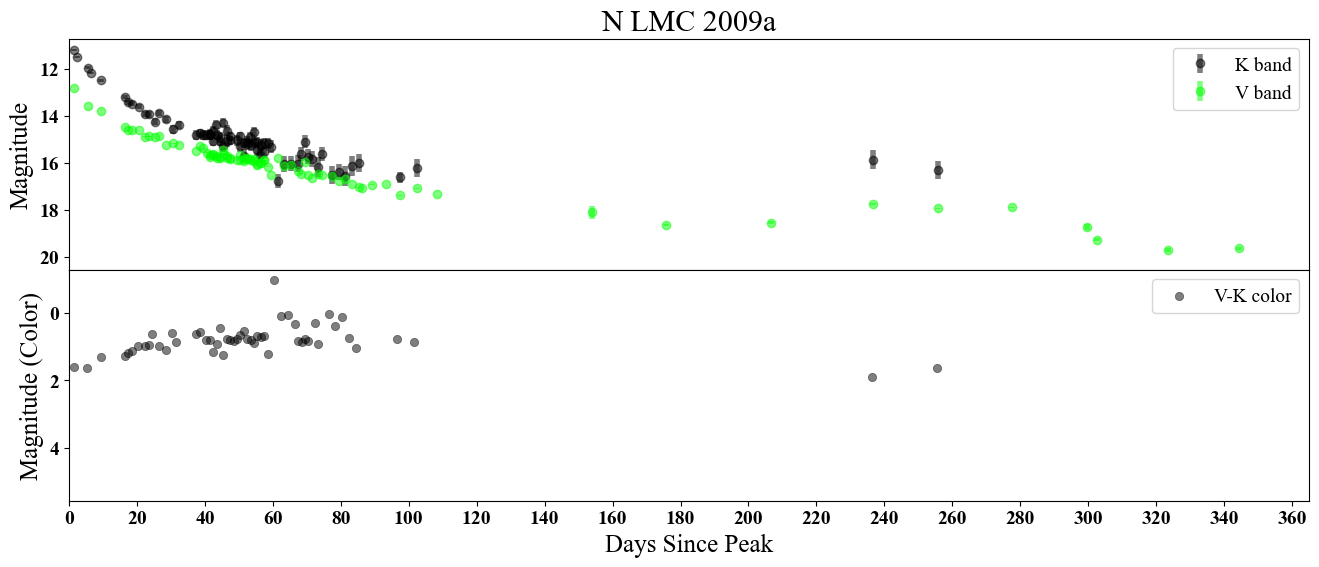

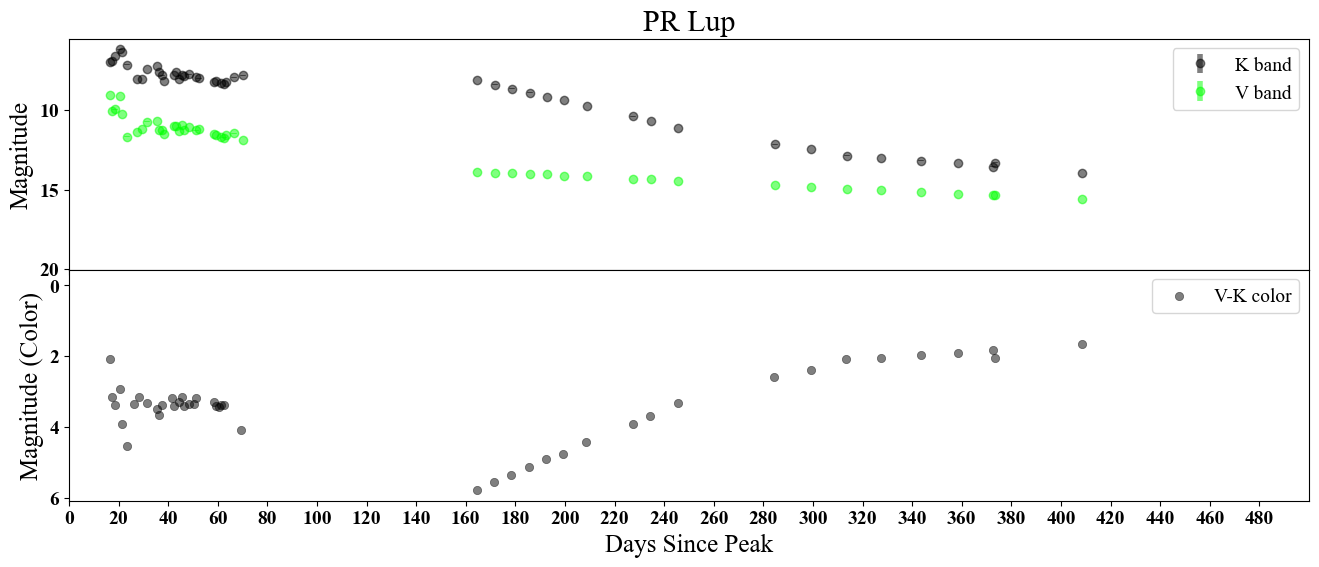

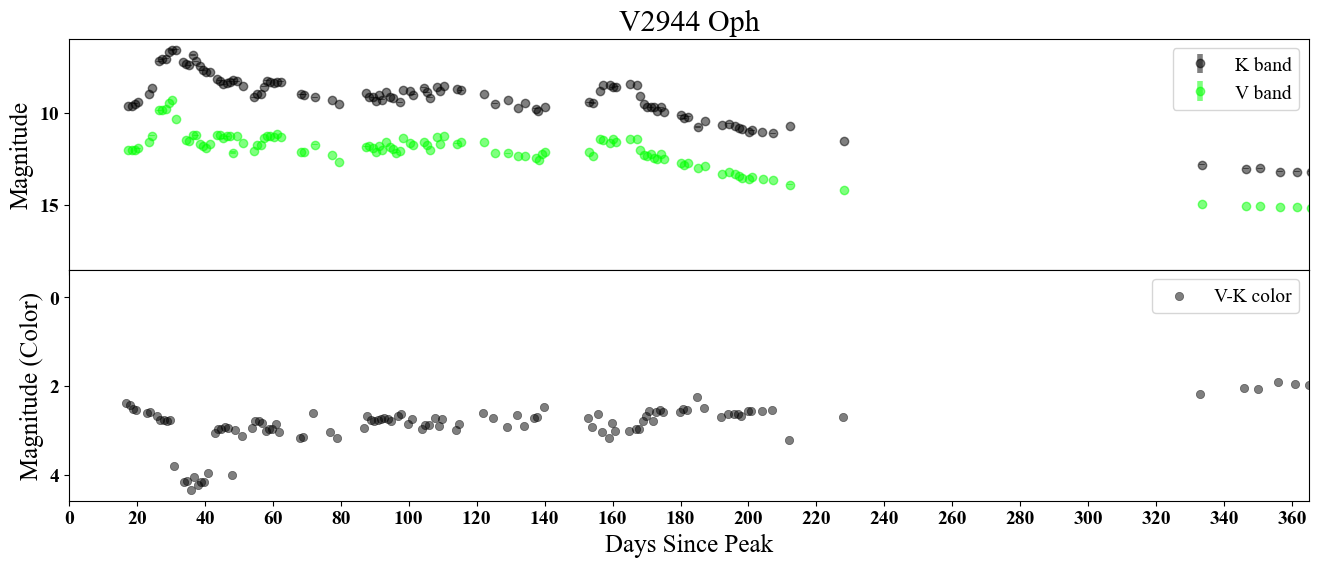

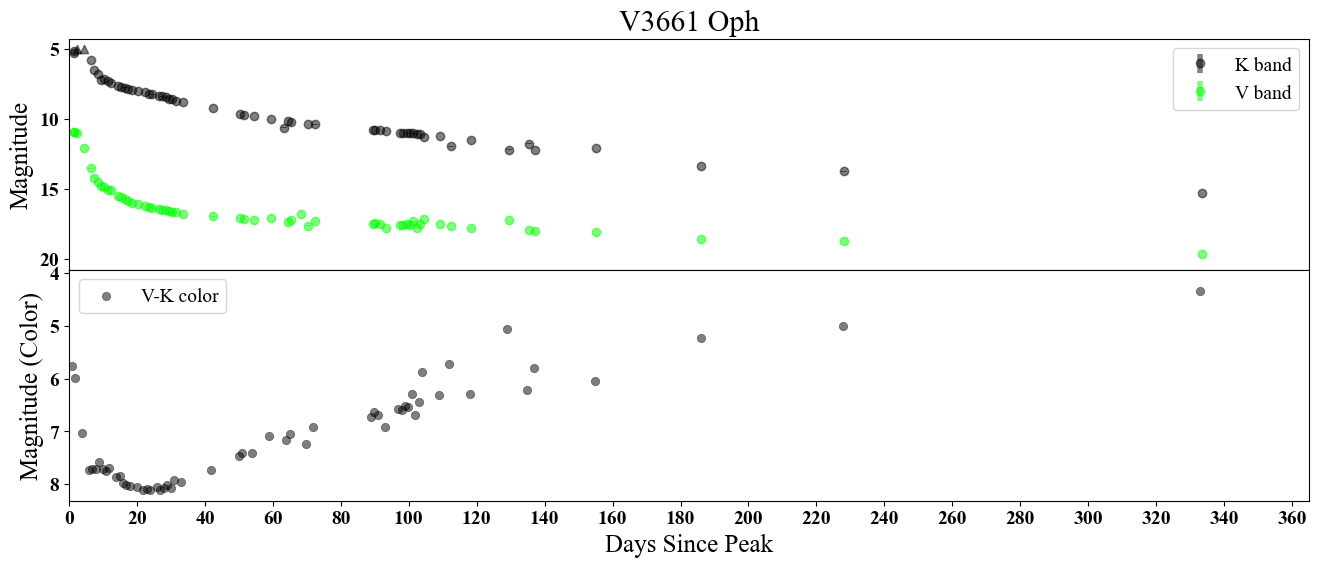

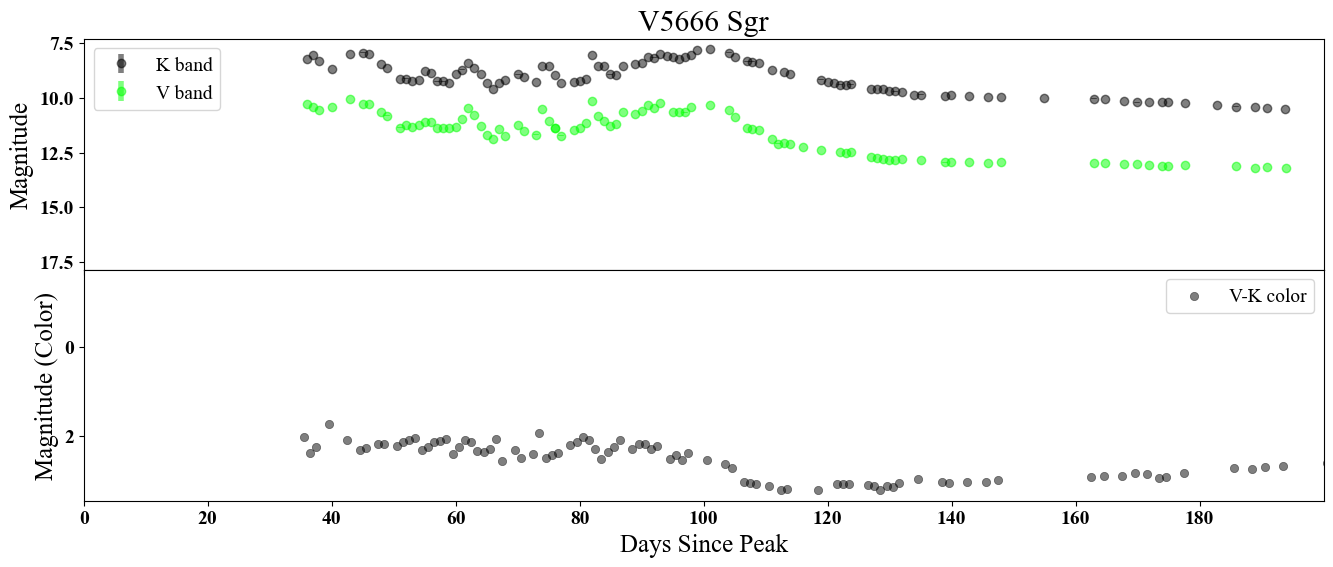

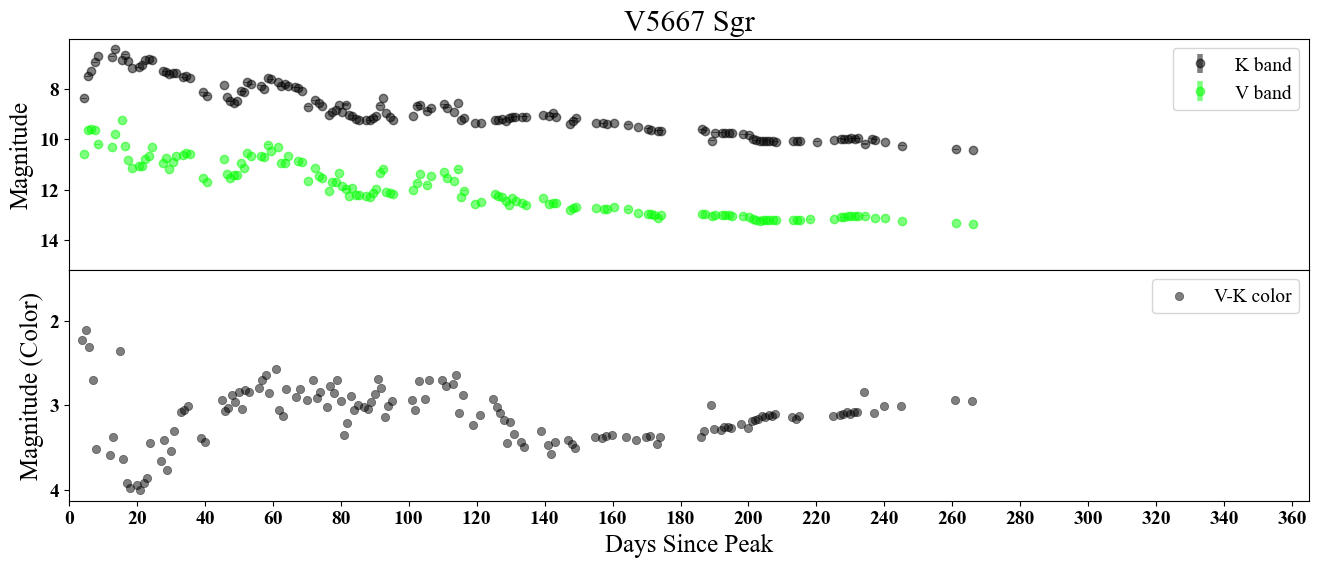

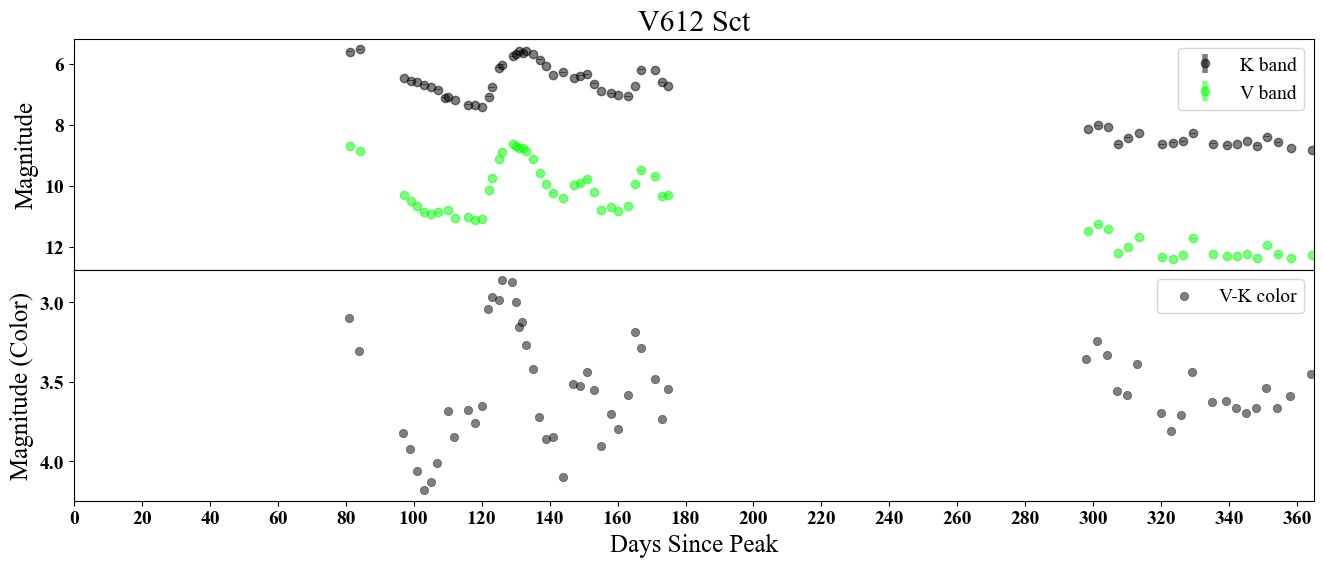

In [20]:
#main plots for unsure
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==-1:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=365
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
        fig.set_size_inches(16,6)
        fig.subplots_adjust(hspace=0)
        boundsKdate,boundsKmag,boundsKerror=removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii])
        ax1.errorbar(np.asarray(boundsKdate)+tmax0list[ii],boundsKmag,boundsKerror,elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        boundsVdate,boundsVmag,boundsVerror=removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii])
        ax1.errorbar(np.asarray(boundsVdate)+tmax0list[ii],boundsVmag,boundsVerror,elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]]+tmax0list[ii],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]]+tmax0list[ii],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]]+tmax0list[ii],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]]+tmax0list[ii],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(np.asarray(KV_daylist)+tmax0list[ii],KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.set_ylabel('Magnitude (Color)')
        xlabel0=' Peak'
        if tmax0list[ii]==0.:
            xlabel0=' Discovery'
        ax2.set_xlabel('Days Since'+xlabel0)
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

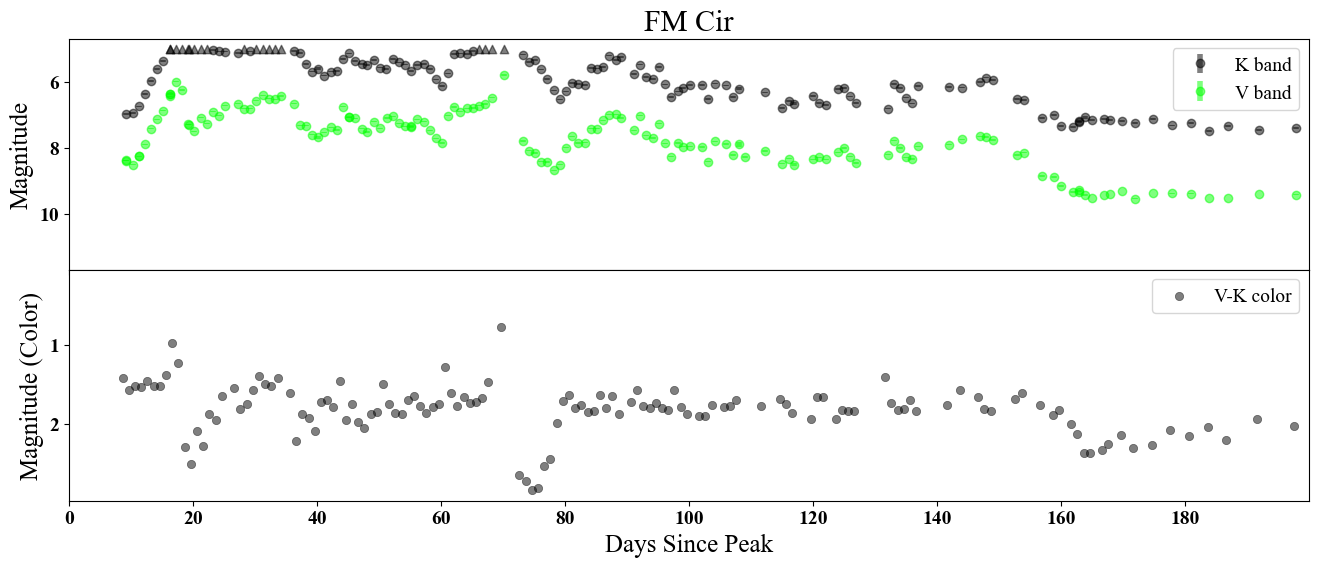

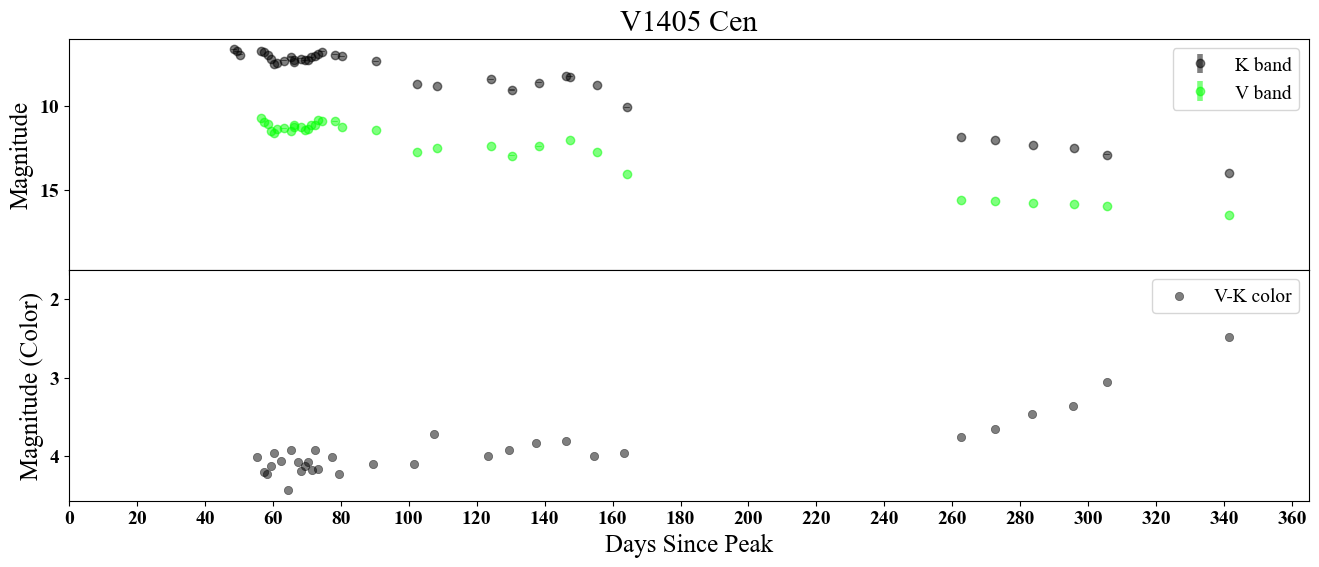

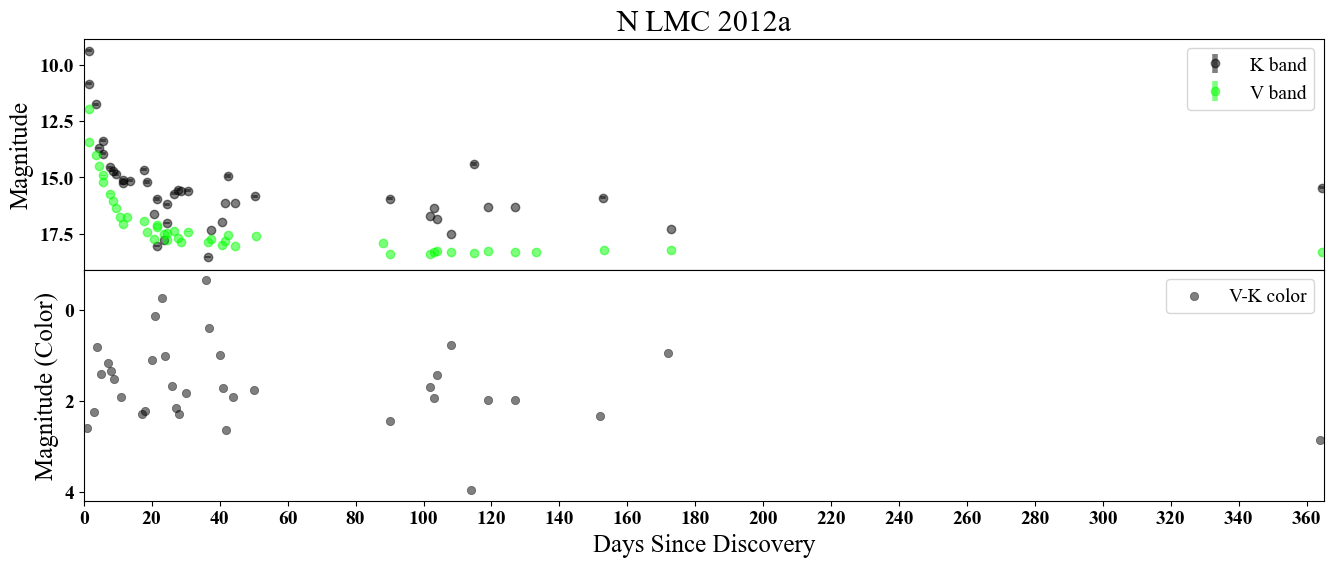

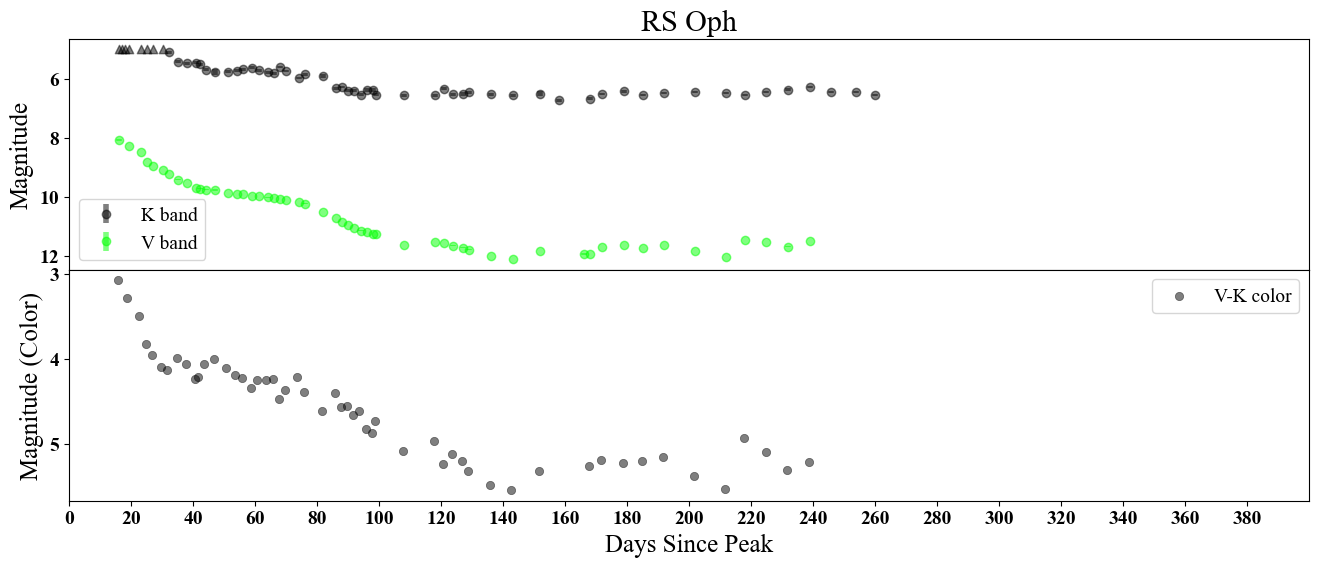

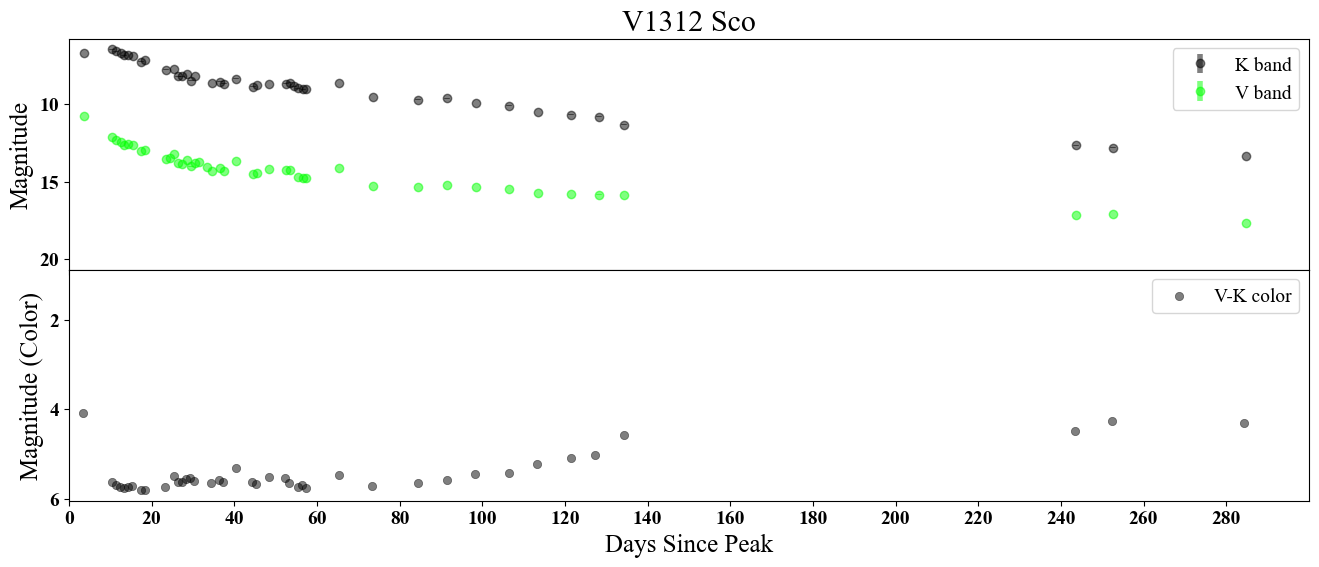

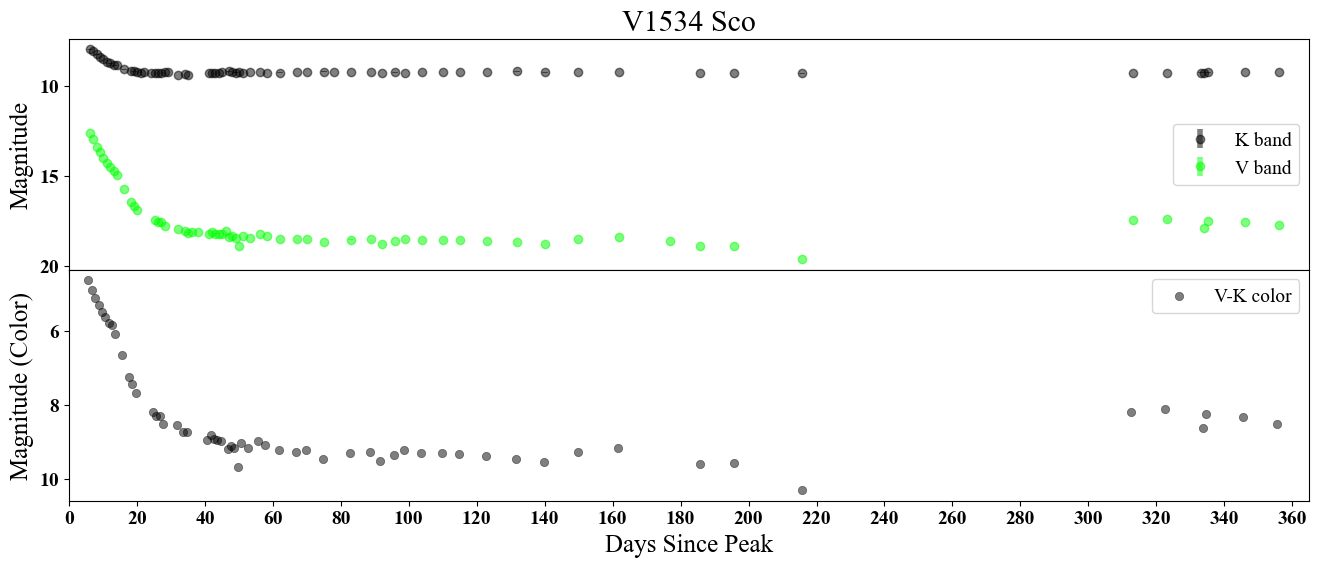

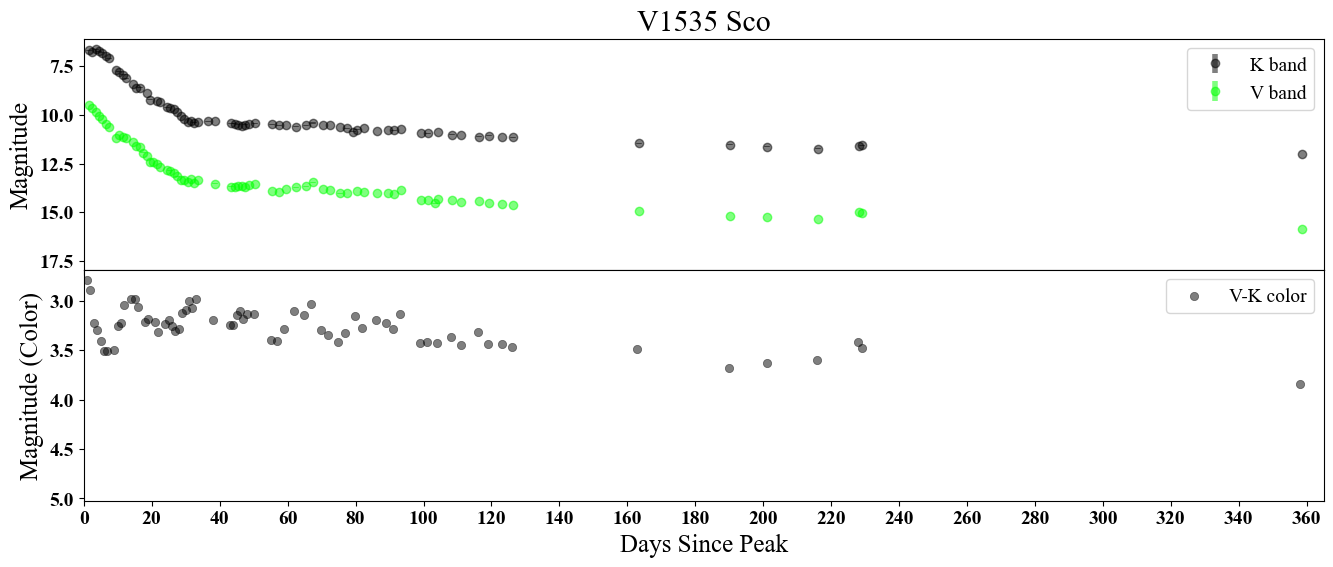

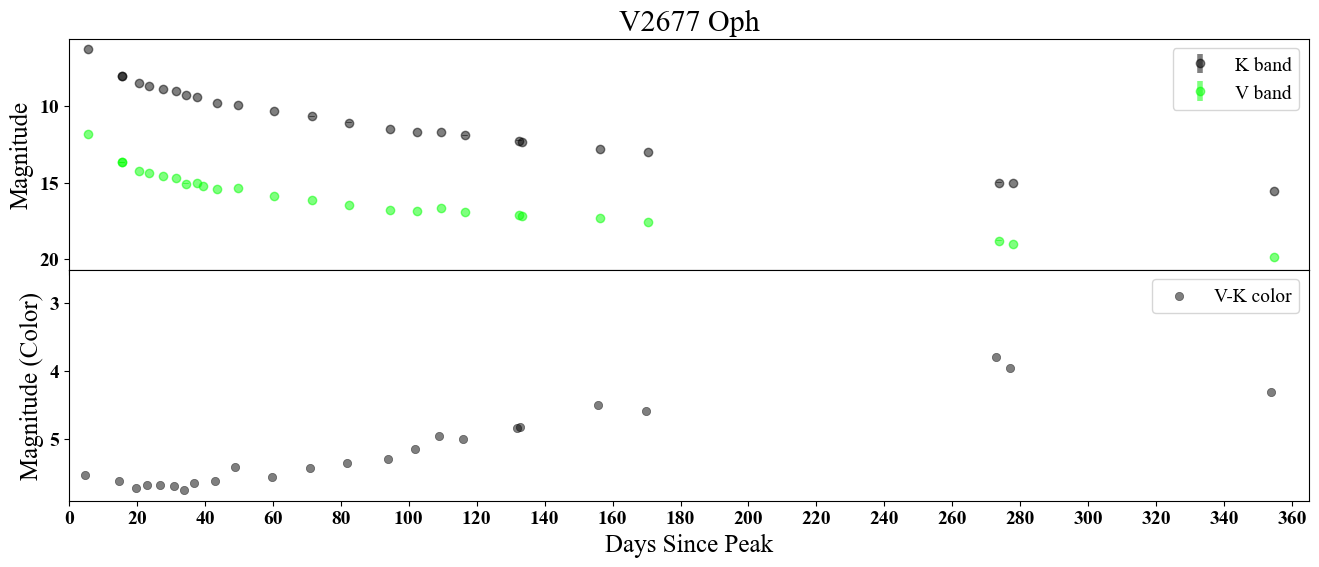

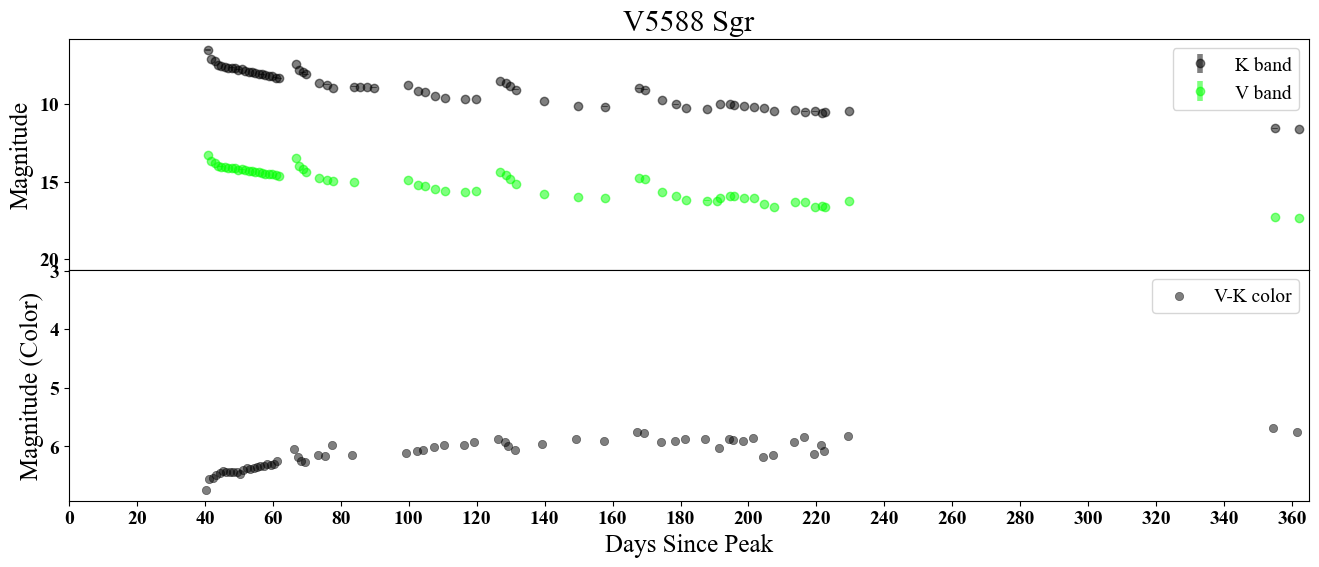

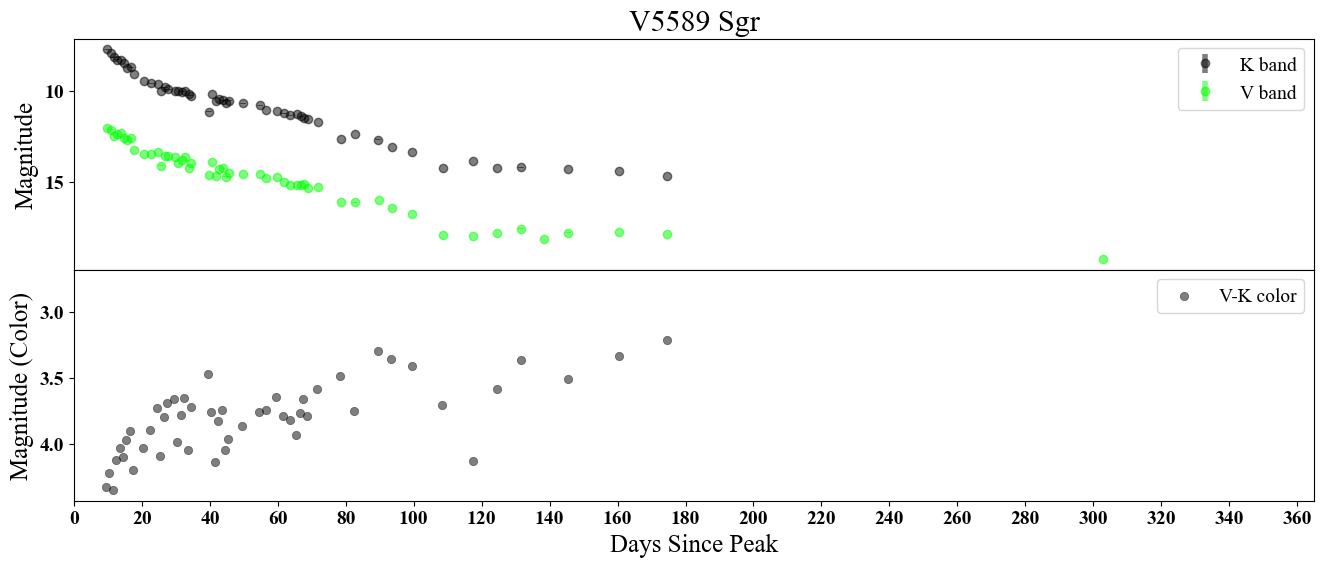

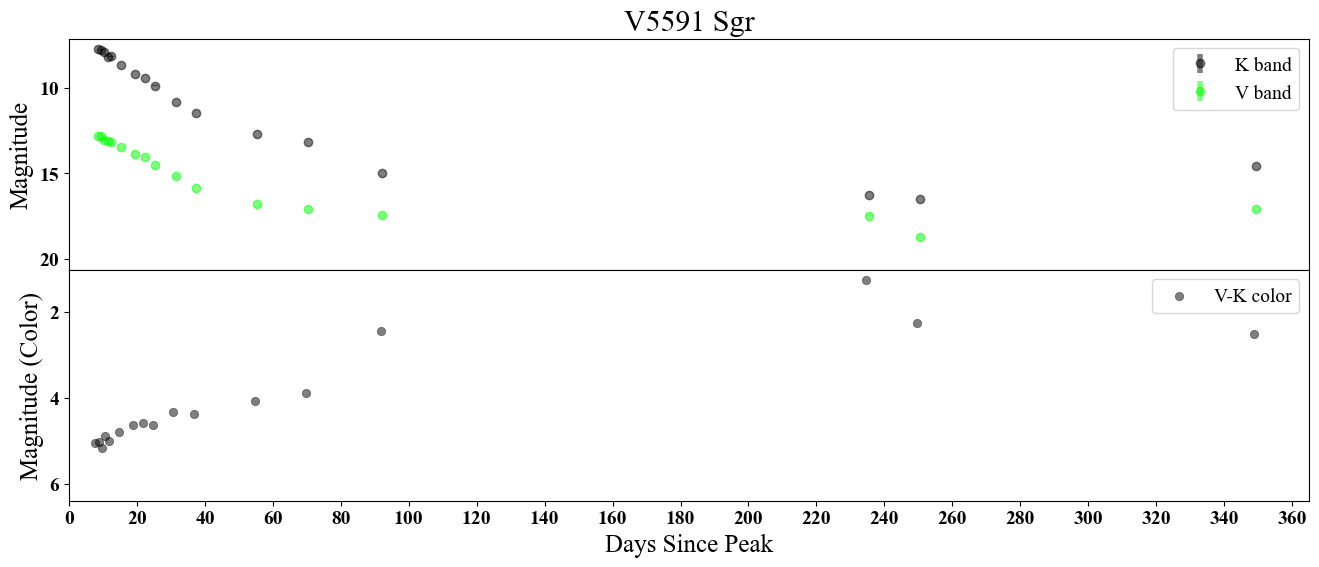

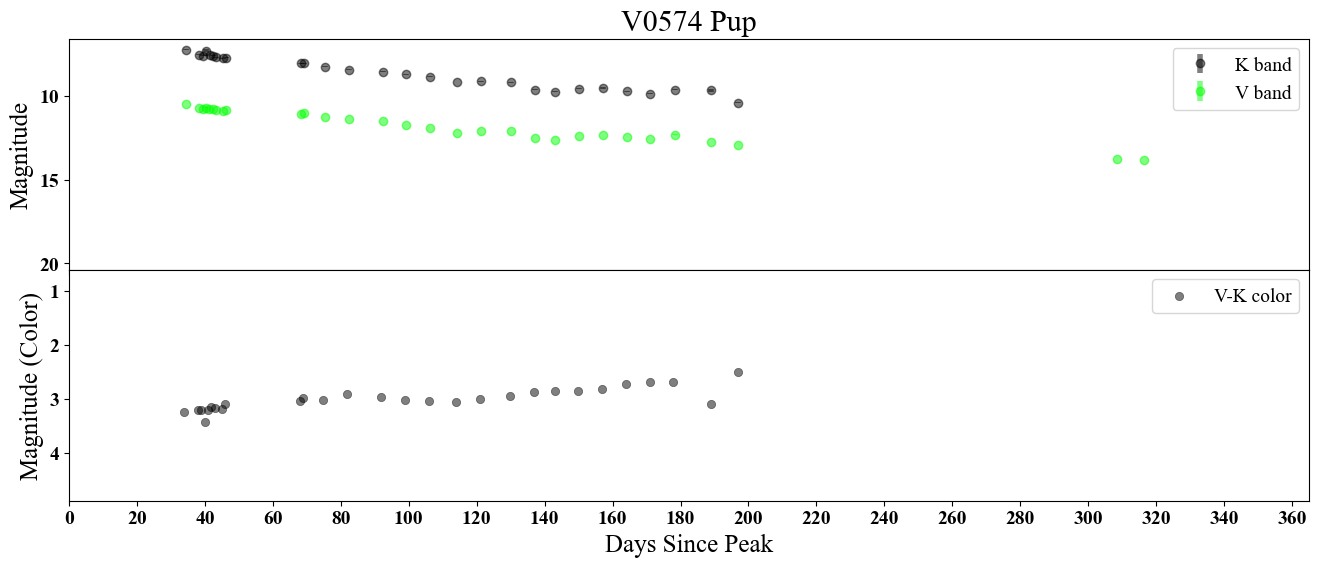

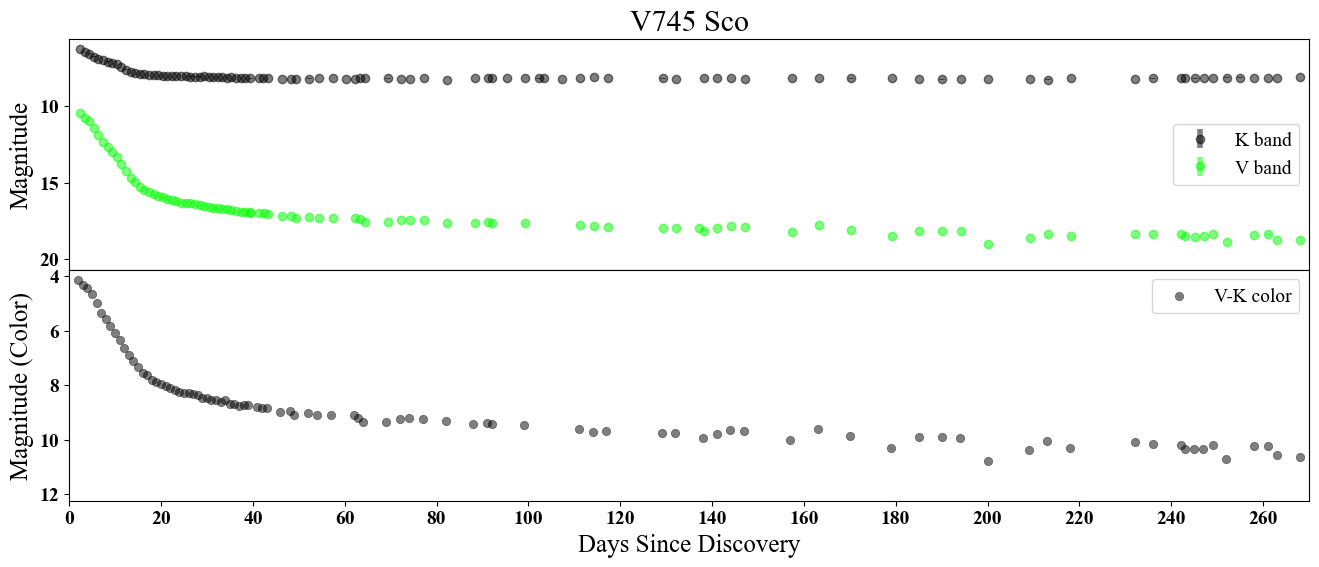

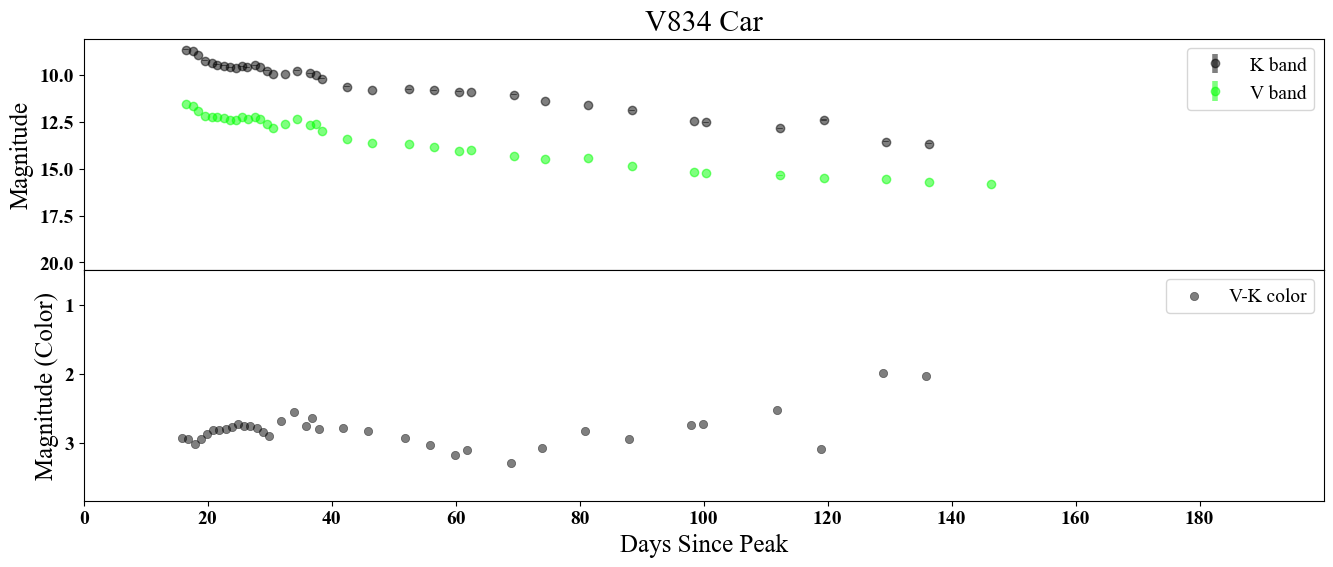

In [21]:
#main plots for none
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==0:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=365
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
        fig.set_size_inches(16,6)
        fig.subplots_adjust(hspace=0)
        boundsKdate,boundsKmag,boundsKerror=removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii])
        ax1.errorbar(np.asarray(boundsKdate)+tmax0list[ii],boundsKmag,boundsKerror,elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        boundsVdate,boundsVmag,boundsVerror=removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii])
        ax1.errorbar(np.asarray(boundsVdate)+tmax0list[ii],boundsVmag,boundsVerror,elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]]+tmax0list[ii],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]]+tmax0list[ii],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]]+tmax0list[ii],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]]+tmax0list[ii],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(np.asarray(KV_daylist)+tmax0list[ii],KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.set_ylabel('Magnitude (Color)')
        xlabel0=' Peak'
        if tmax0list[ii]==0.:
            xlabel0=' Discovery'
        ax2.set_xlabel('Days Since'+xlabel0)
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

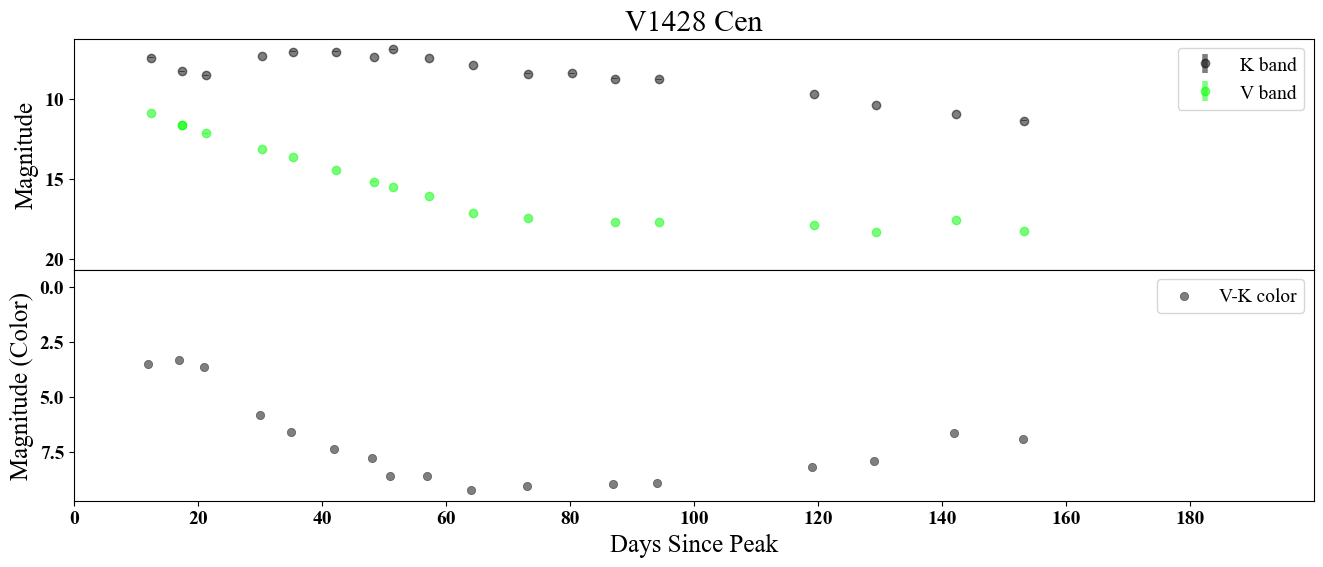

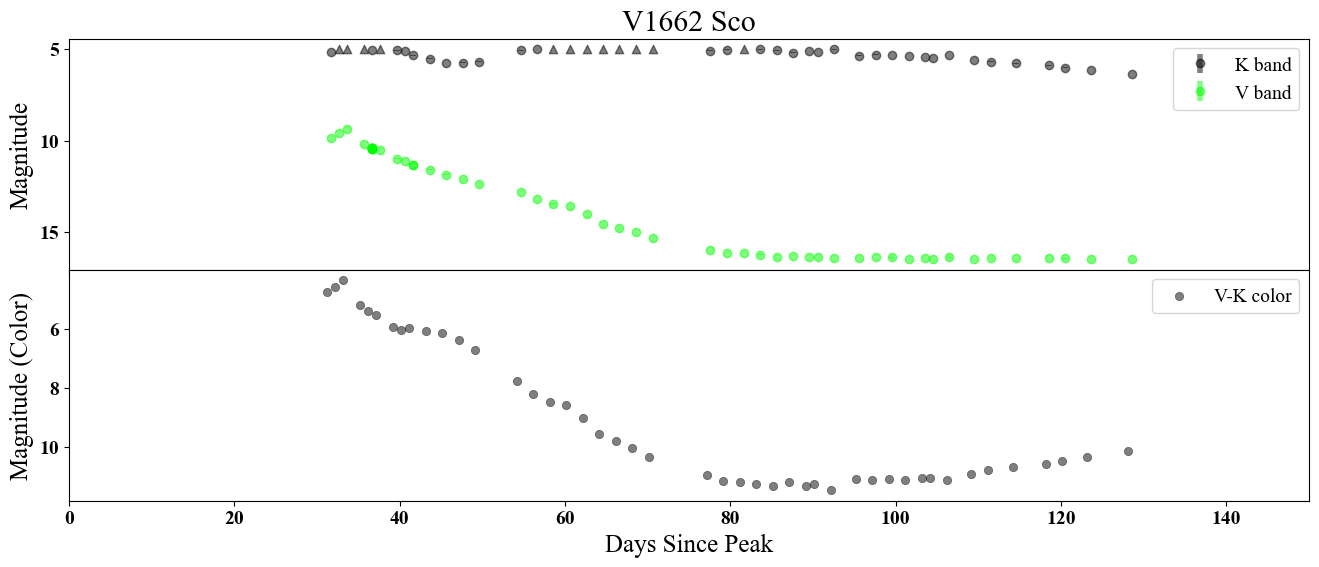

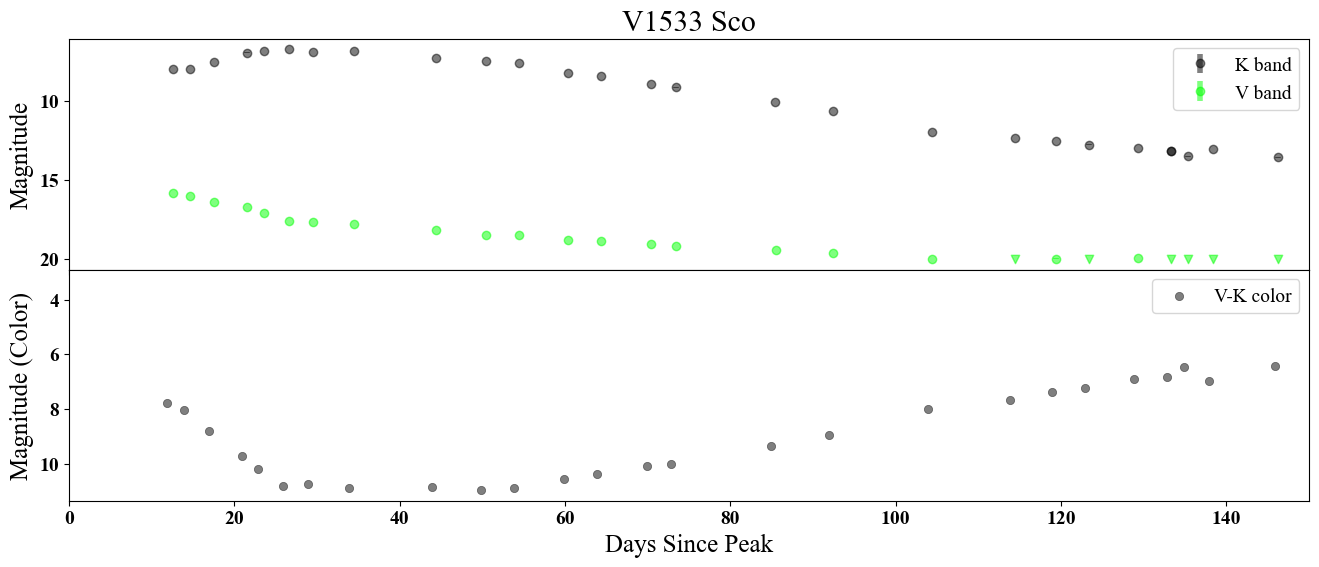

In [22]:
#main plots for ir_excess
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==1:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=365
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        d_start=float(np.asarray(Decent_Dust.loc[:,'d_start'])[Decent_Dust_index])
        d_bottom=float(np.asarray(Decent_Dust.loc[:,'d_bottom'])[Decent_Dust_index])
        features.loc[Decent_Dust_Names[Decent_Dust_index],'start']=d_start
        features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom']=d_bottom
        start_patch=np.searchsorted(np.asarray(Vdate)+tmax0list[ii],d_start)
        if start_patch==0:
            start_patch='Left'
        else:
            start_patch1=Vdate[start_patch-1]+tmax0list[ii]
            start_patch2=Vdate[start_patch]+tmax0list[ii]
        bottom_patch=np.searchsorted(np.asarray(Vdate)+tmax0list[ii],d_bottom,side='right')
        if bottom_patch==len(Vdate):
            bottom_patch='Right'
        else:
            bottom_patch1=Vdate[bottom_patch-1]+tmax0list[ii]
            bottom_patch2=Vdate[bottom_patch]+tmax0list[ii]
        fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
        fig.set_size_inches(16,6)
        fig.subplots_adjust(hspace=0)
        boundsKdate,boundsKmag,boundsKerror=removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii])
        ax1.errorbar(np.asarray(boundsKdate)+tmax0list[ii],boundsKmag,boundsKerror,elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        boundsVdate,boundsVmag,boundsVerror=removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii])
        ax1.errorbar(np.asarray(boundsVdate)+tmax0list[ii],boundsVmag,boundsVerror,elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]]+tmax0list[ii],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]]+tmax0list[ii],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]]+tmax0list[ii],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]]+tmax0list[ii],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(np.asarray(KV_daylist)+tmax0list[ii],KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.set_ylabel('Magnitude (Color)')
        xlabel0=' Peak'
        if tmax0list[ii]==0.:
            xlabel0=' Discovery'
        ax2.set_xlabel('Days Since'+xlabel0)
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        ylim_1_ax1,ylim_2_ax1=ax1.get_ylim()
        ylim_1_ax2,ylim_2_ax2=ax2.get_ylim()
        # ax1.axvline(d_start,ls='--',color='royalblue')
        # ax2.axvline(d_start,ls='--',color='royalblue')
        # ax1.axvline(d_bottom,ls='--',color='red')
        # ax2.axvline(d_bottom,ls='--',color='red')
        # if start_patch=='Left':
        #     ax1.fill_between(np.linspace(xlim_1,Vdate[0]+tmax0list[ii],3),ylim_1_ax1,ylim_2_ax1,alpha=0.25,color='royalblue')
        #     ax2.fill_between(np.linspace(xlim_1,Vdate[0]+tmax0list[ii],3),ylim_1_ax2,ylim_2_ax2,alpha=0.25,color='royalblue')
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'start_err+']=Vdate[0]+tmax0list[ii]-d_start
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'start_err-']=0.0-d_start
        # else:
        #     ax1.fill_between(np.linspace(start_patch1,start_patch2,3),ylim_1_ax1,ylim_2_ax1,alpha=0.25,color='royalblue')
        #     ax2.fill_between(np.linspace(start_patch1,start_patch2,3),ylim_1_ax2,ylim_2_ax2,alpha=0.25,color='royalblue')
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'start_err+']=start_patch2-d_start
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'start_err-']=start_patch1-d_start
        # if bottom_patch=='Right':
        #     ax1.fill_between(np.linspace(Vdate[-1]+tmax0list[ii],xlim_2,10),ylim_1_ax1,ylim_2_ax1,alpha=0.25,color='red')
        #     ax2.fill_between(np.linspace(Vdate[-1]+tmax0list[ii],xlim_2,10),ylim_1_ax2,ylim_2_ax2,alpha=0.25,color='red')
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom_err+']=365-d_bottom
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom_err-']=Vdate[-1]+tmax0list[ii]-d_bottom
        # else:
        #     ax1.fill_between(np.linspace(bottom_patch1,bottom_patch2,10),ylim_1_ax1,ylim_2_ax1,alpha=0.25,color='red')
        #     ax2.fill_between(np.linspace(bottom_patch1,bottom_patch2,10),ylim_1_ax2,ylim_2_ax2,alpha=0.25,color='red')
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom_err+']=365-d_bottom
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom_err-']=Vdate[-1]+tmax0list[ii]-d_bottom
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

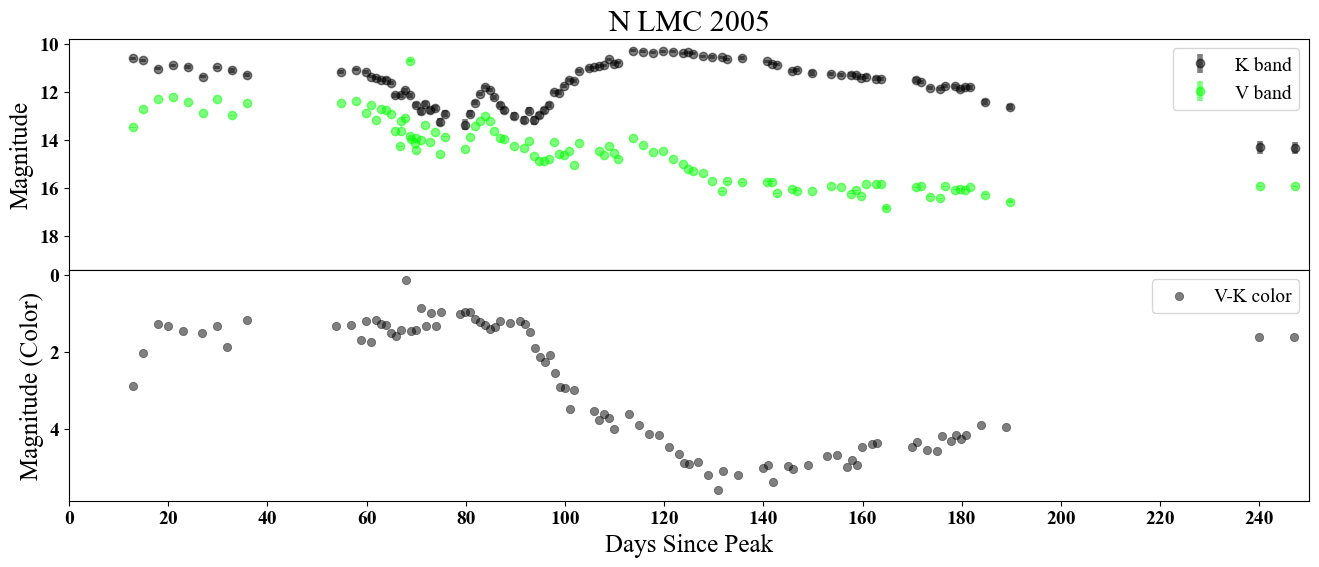

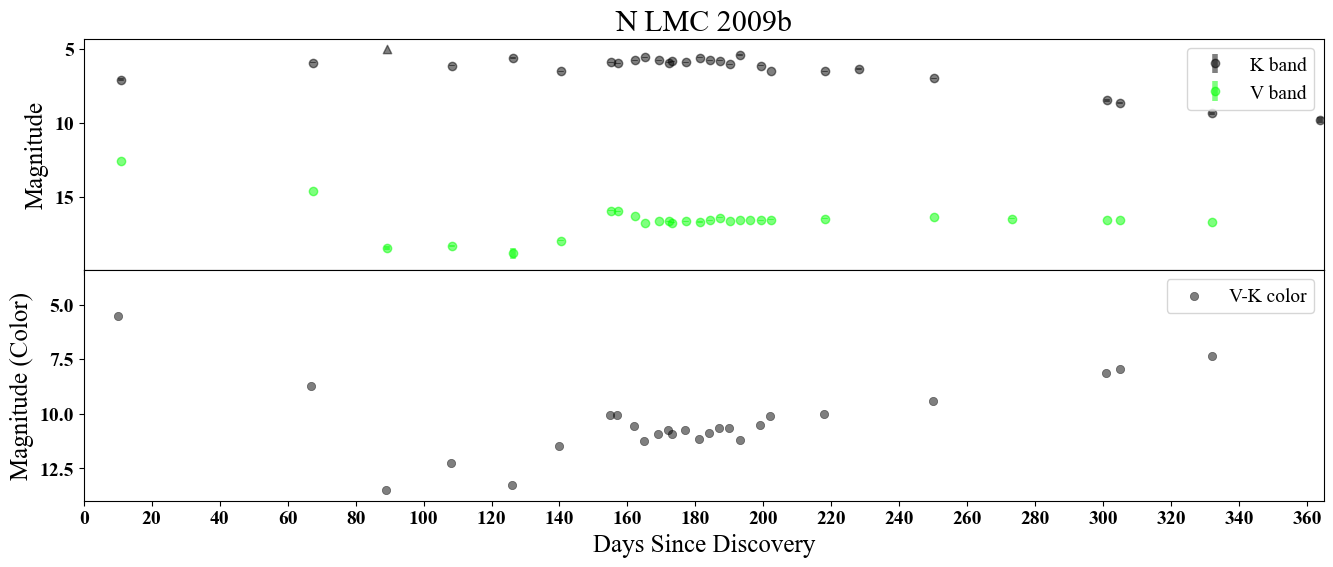

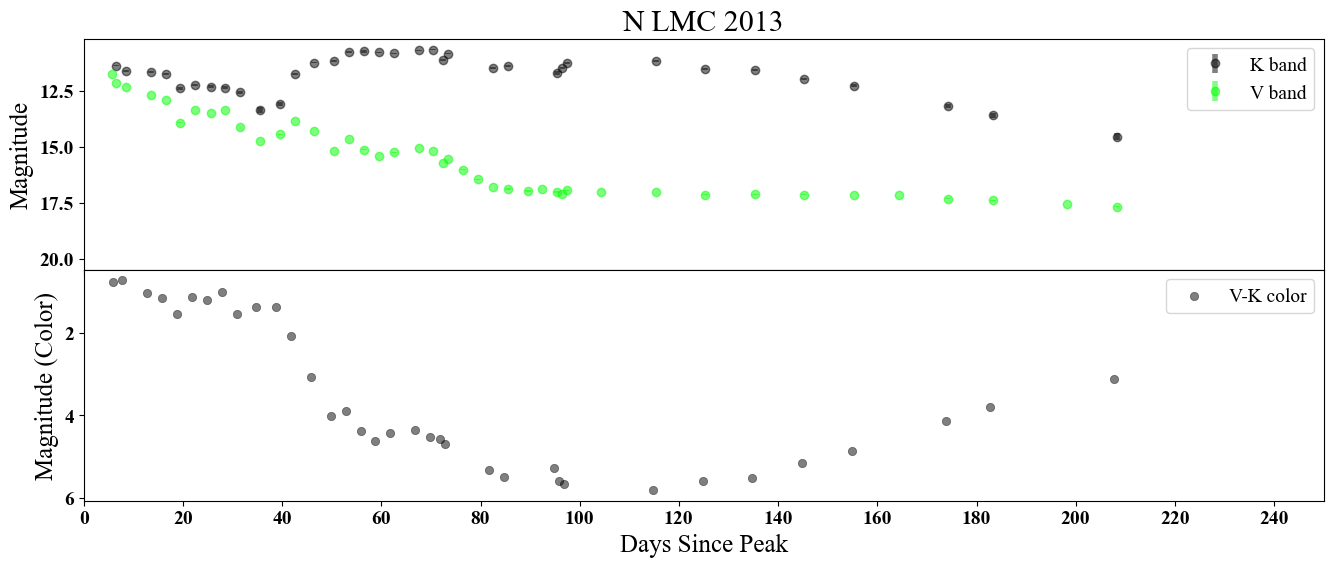

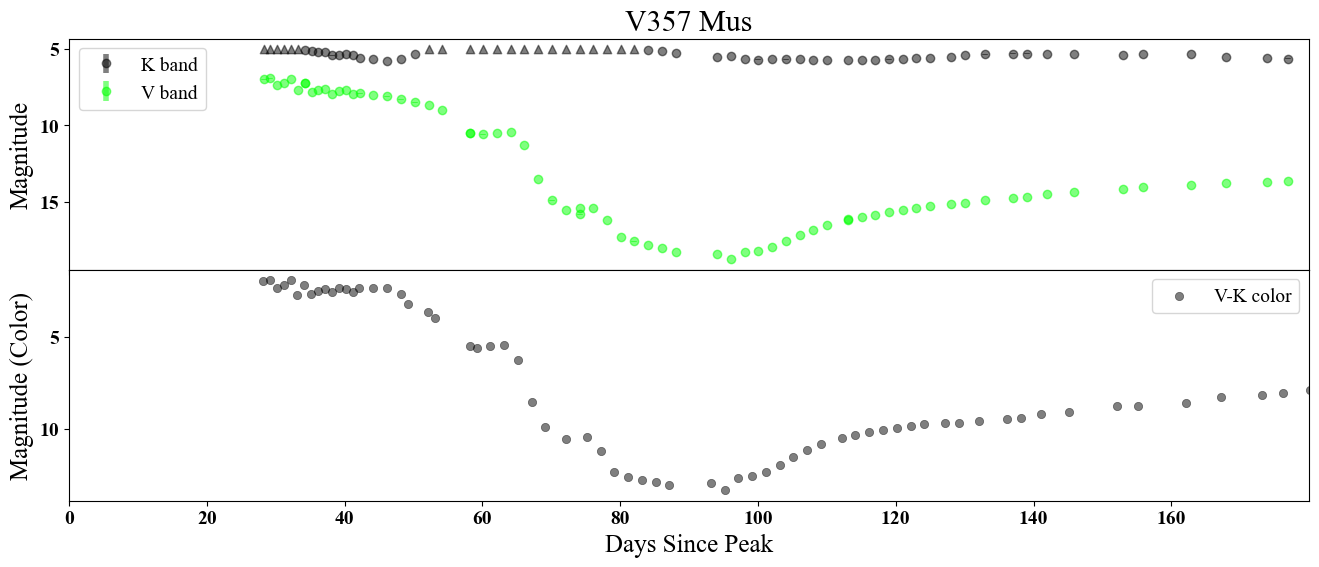

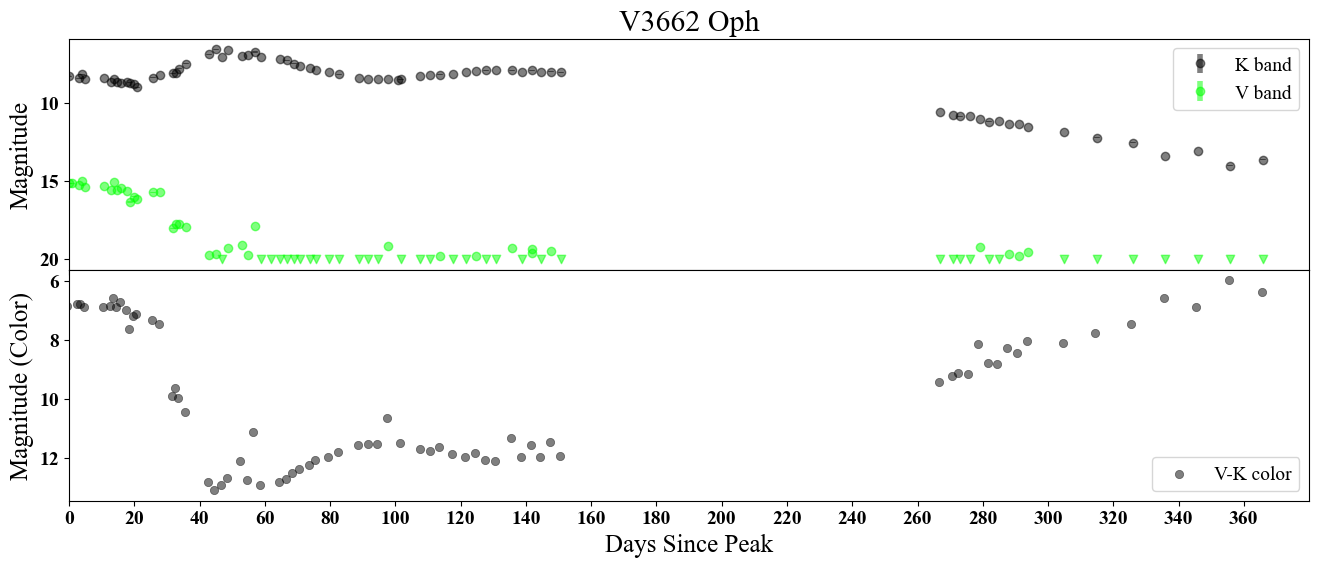

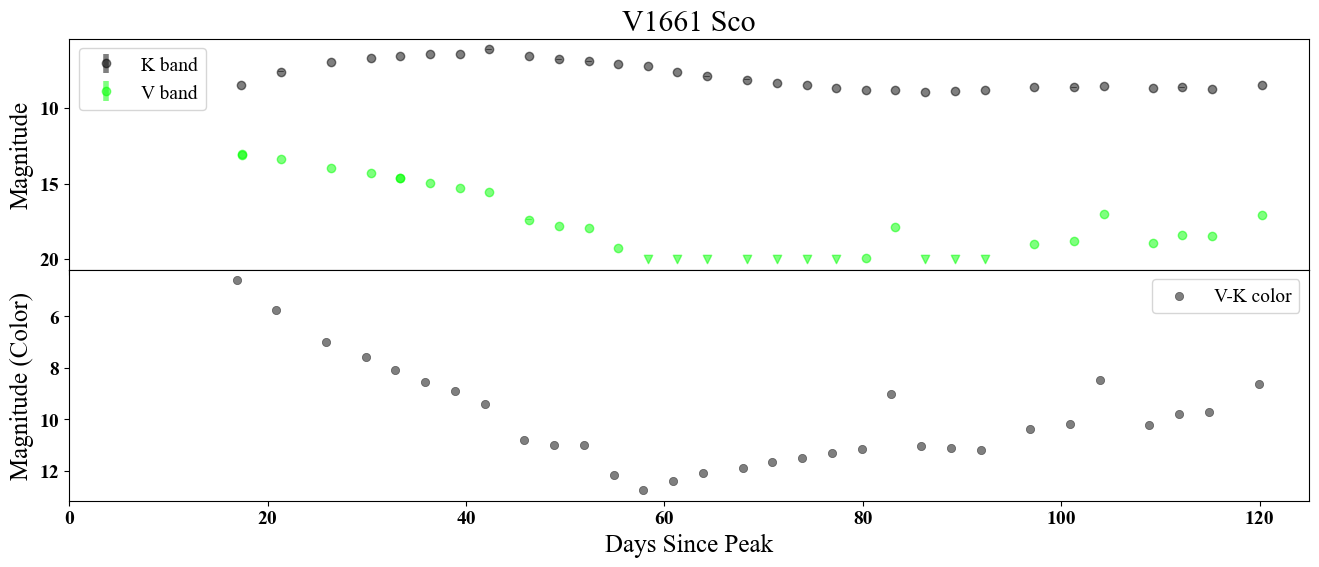

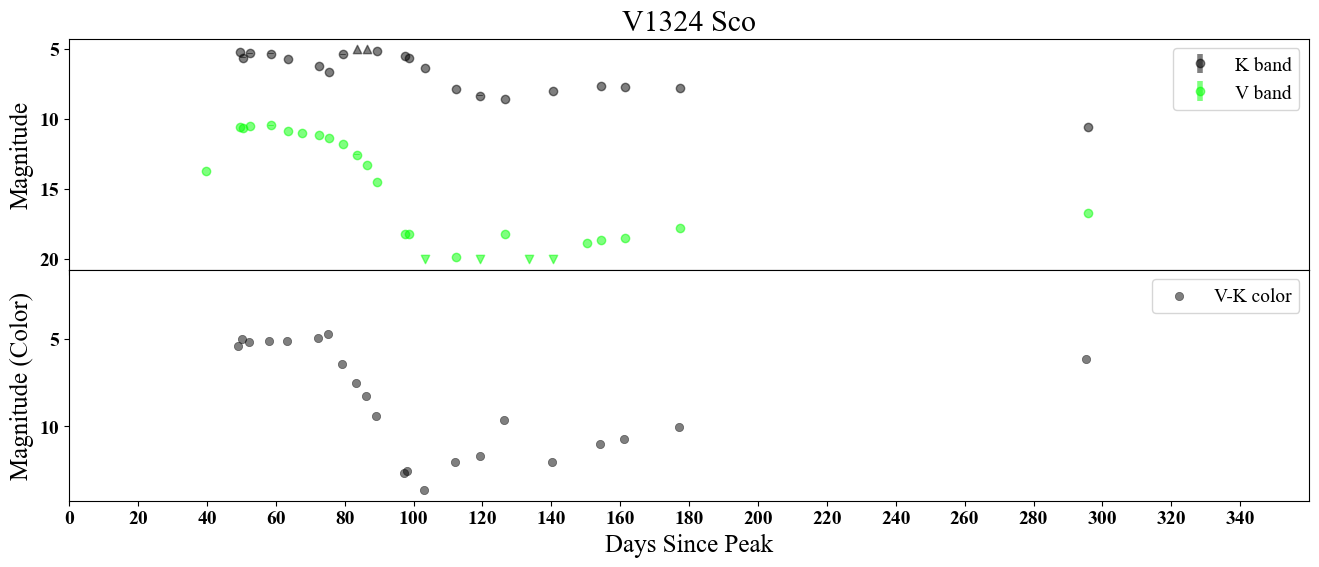

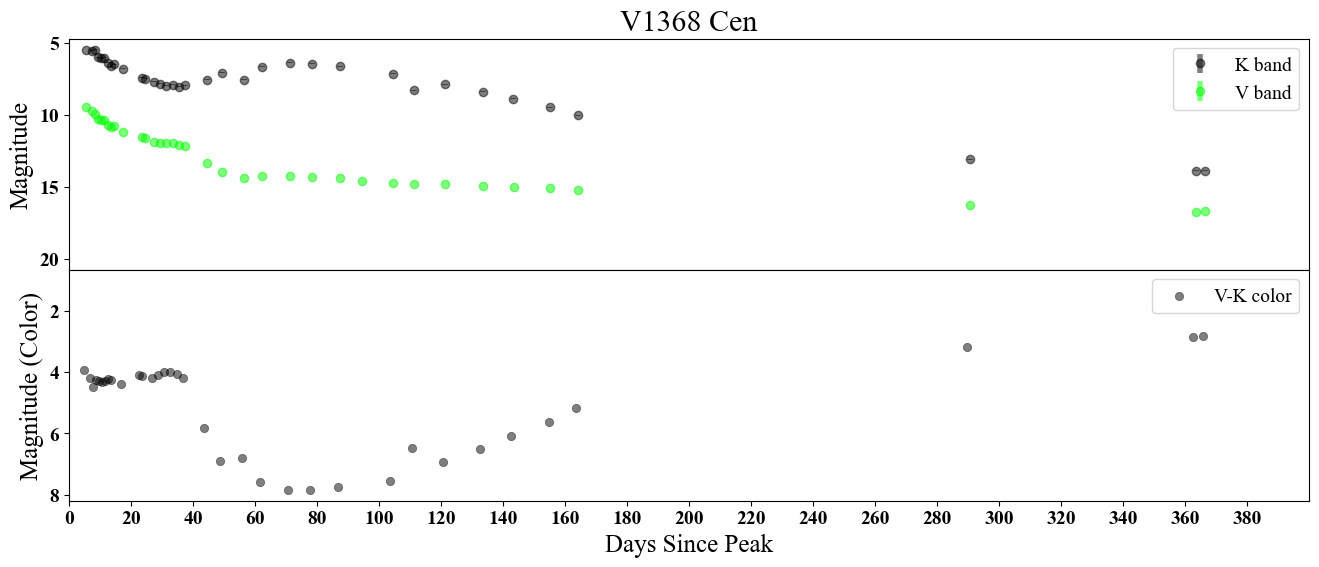

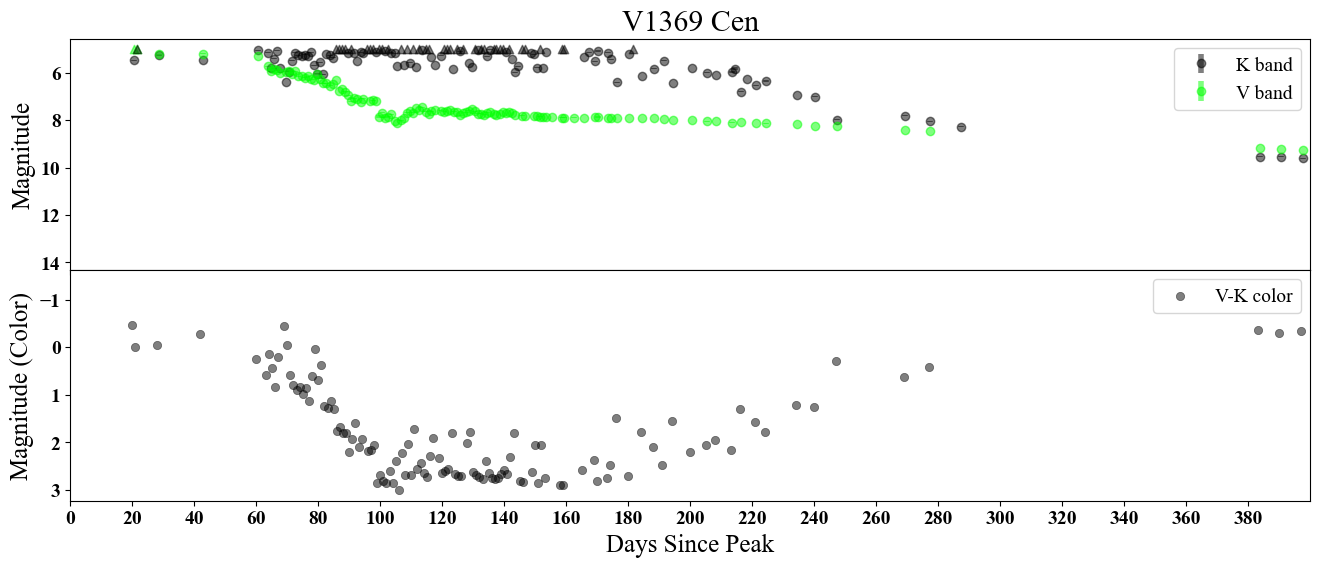

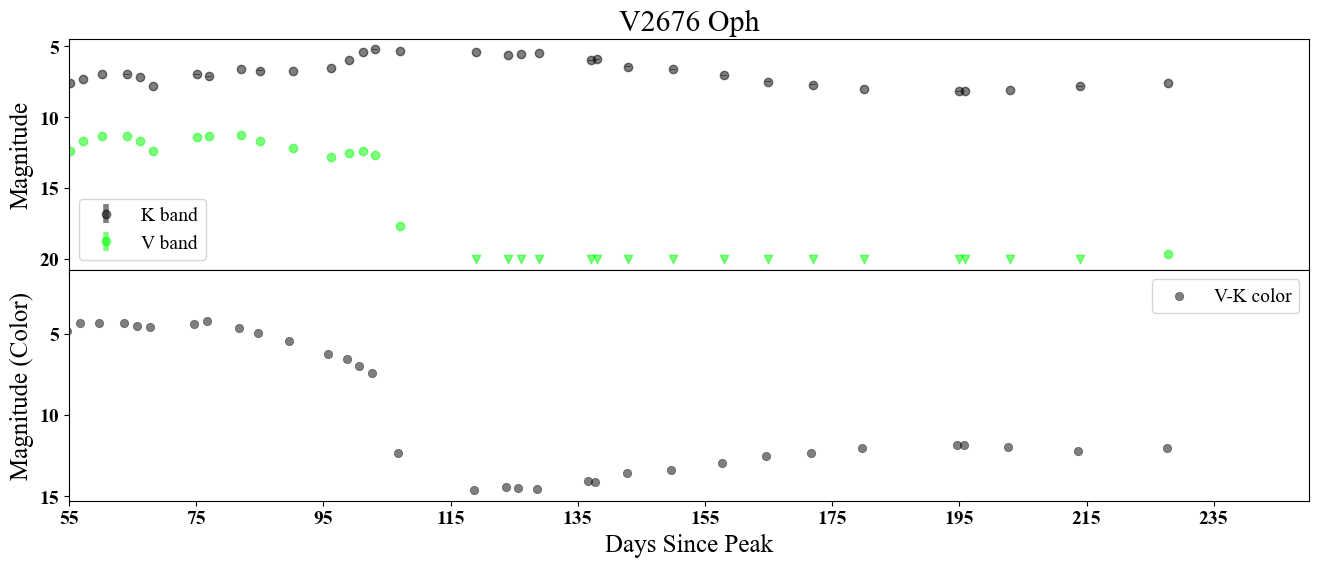

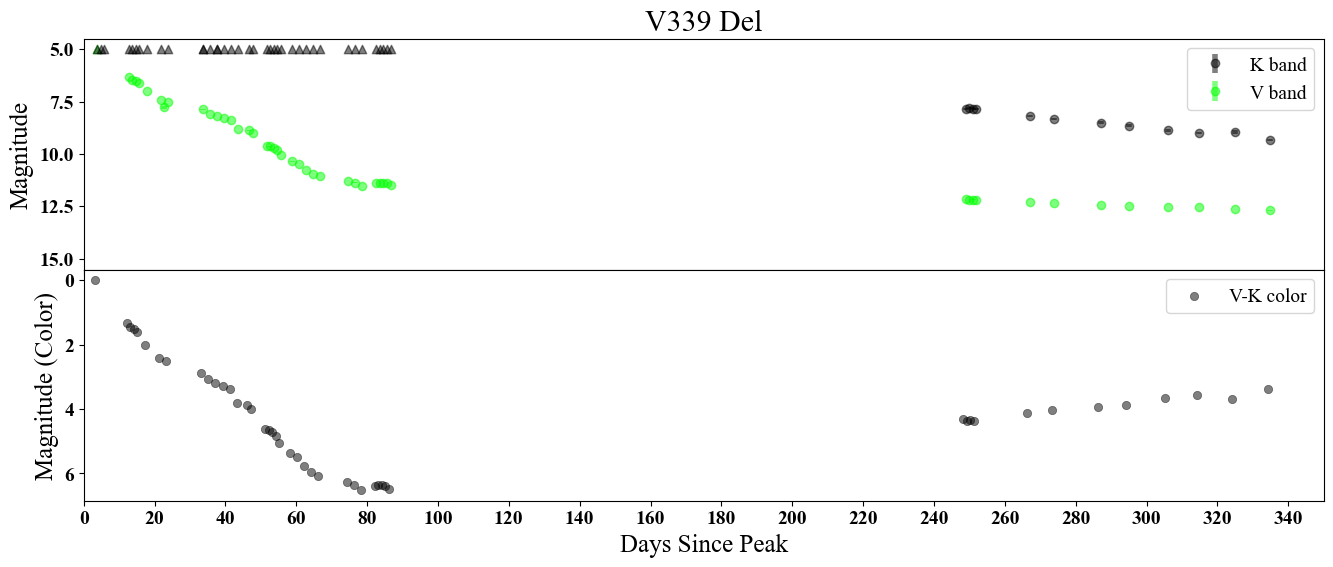

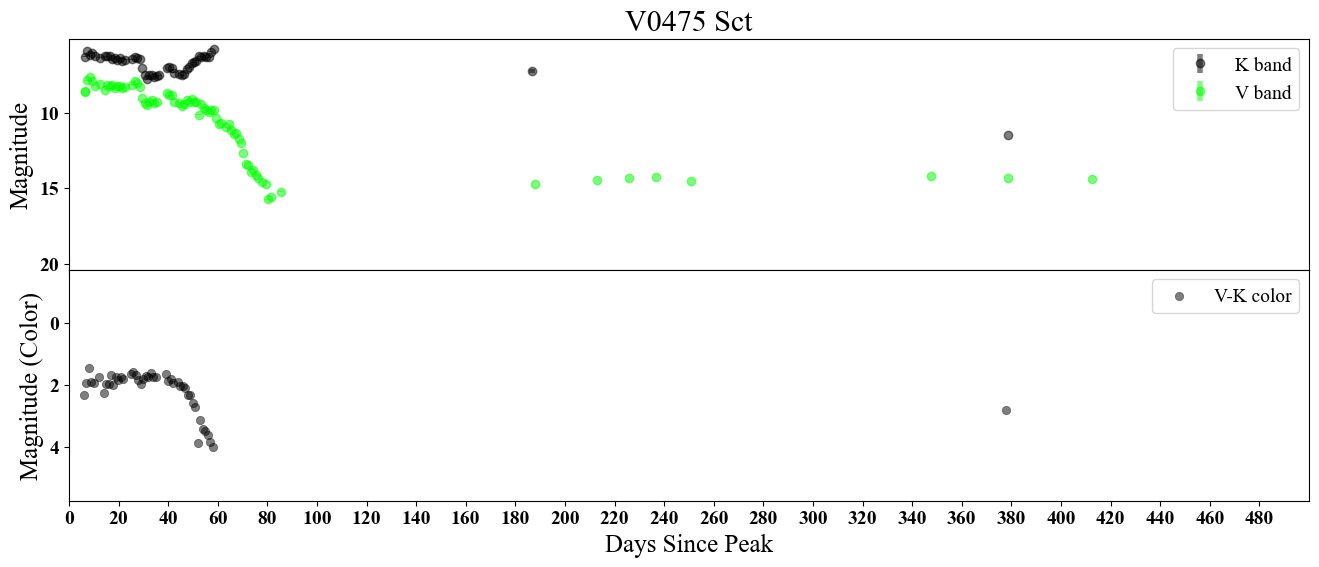

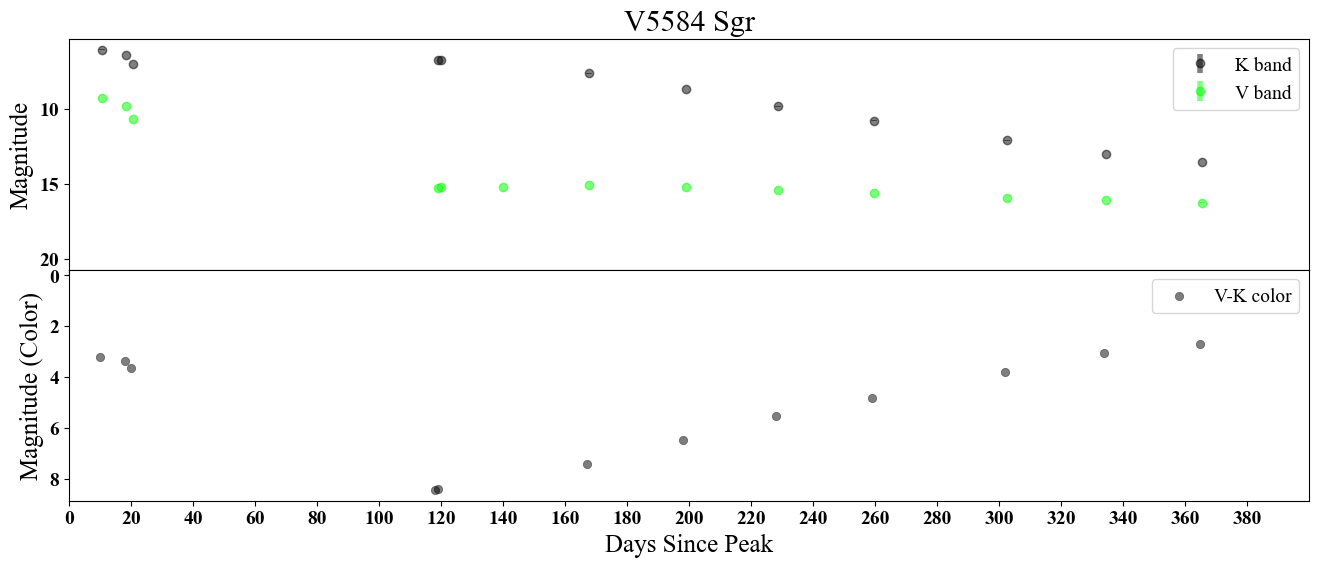

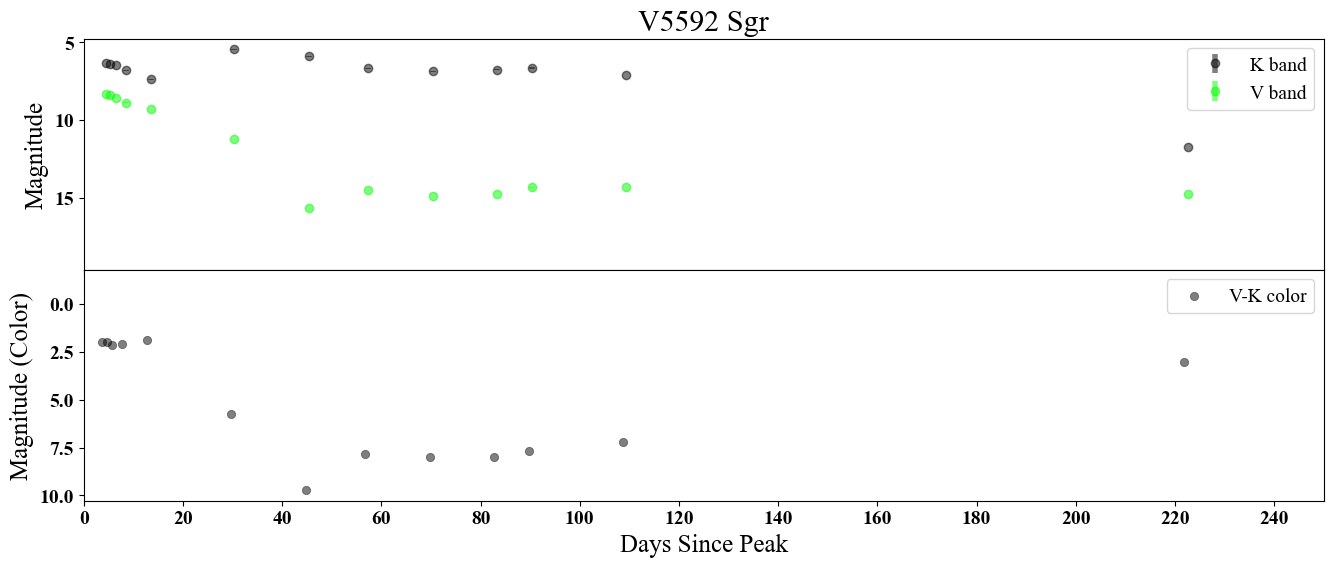

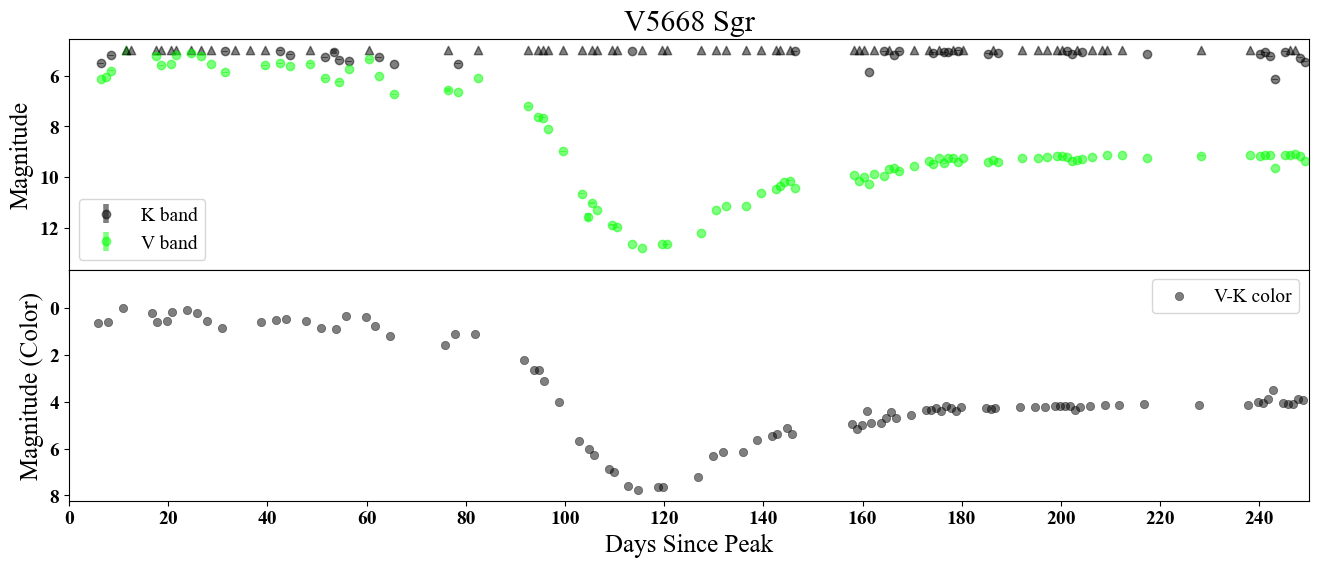

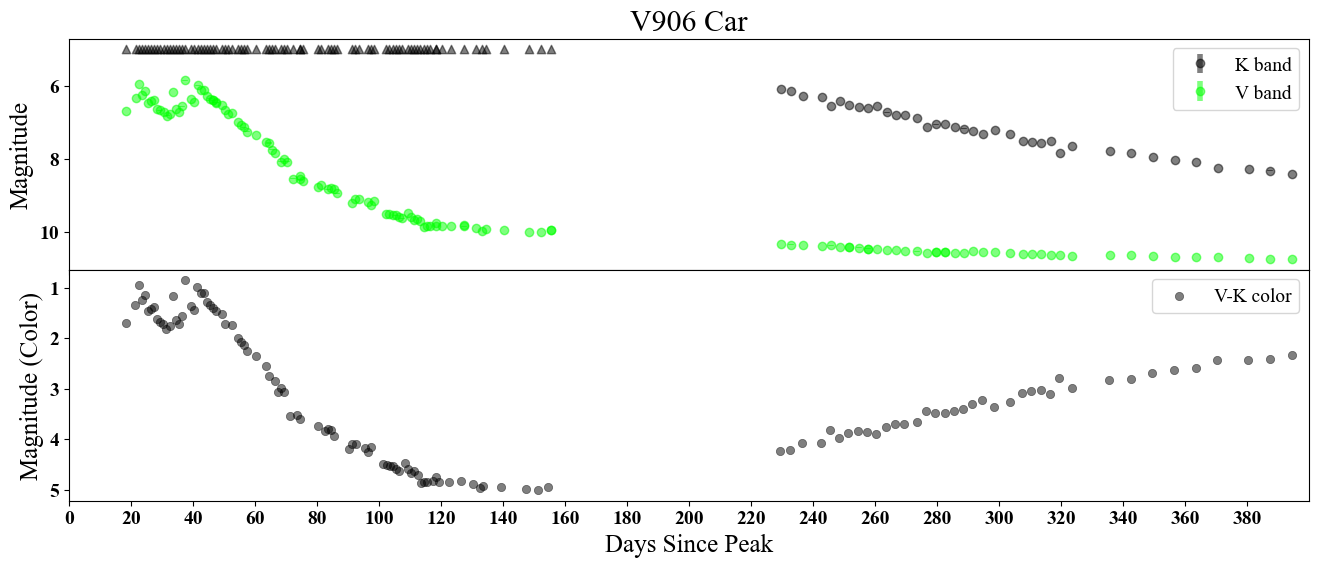

In [23]:
#main plots for dust dip
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==2:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        KV_daylist=KV_daylist_list[ii]
        KV_maglist=KV_maglist_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=365
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        d_start=float(np.asarray(Decent_Dust.loc[:,'d_start'])[Decent_Dust_index])
        d_bottom=float(np.asarray(Decent_Dust.loc[:,'d_bottom'])[Decent_Dust_index])
        features.loc[Decent_Dust_Names[Decent_Dust_index],'start']=d_start
        features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom']=d_bottom
        start_patch=np.searchsorted(np.asarray(Vdate)+tmax0list[ii],d_start)
        if start_patch==0:
            start_patch='Left'
        else:
            start_patch1=Vdate[start_patch-1]+tmax0list[ii]
            start_patch2=Vdate[start_patch]+tmax0list[ii]
        bottom_patch=np.searchsorted(np.asarray(Vdate)+tmax0list[ii],d_bottom,side='right')
        if bottom_patch==len(Vdate):
            bottom_patch='Right'
        else:
            bottom_patch1=Vdate[bottom_patch-1]+tmax0list[ii]
            bottom_patch2=Vdate[bottom_patch]+tmax0list[ii]
        fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
        fig.set_size_inches(16,6)
        fig.subplots_adjust(hspace=0)
        boundsKdate,boundsKmag,boundsKerror=removebounds(Kdate,Kmag,Kerror,Ksatlist[ii],Kdimlist[ii])
        ax1.errorbar(np.asarray(boundsKdate)+tmax0list[ii],boundsKmag,boundsKerror,elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
        boundsVdate,boundsVmag,boundsVerror=removebounds(Vdate,Vmag,Verror,Vsatlist[ii],Vdimlist[ii])
        ax1.errorbar(np.asarray(boundsVdate)+tmax0list[ii],boundsVmag,boundsVerror,elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
        if len(Vsatlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vsatlist[ii]]+tmax0list[ii],np.full(np.shape(Vsatlist[ii]),5,float),marker="^",color=Vcolor,alpha=0.5,ls='None')
        if len(Vdimlist[ii])>0:
            ax1.scatter(np.asarray(Vdate)[Vdimlist[ii]]+tmax0list[ii],np.full(np.shape(Vdimlist[ii]),20,float),marker="v",color=Vcolor,alpha=0.5,ls='None')
        if len(Ksatlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Ksatlist[ii]]+tmax0list[ii],np.full(np.shape(Ksatlist[ii]),5,float),marker="^",color=Kcolor,alpha=0.5,ls='None')
        if len(Kdimlist[ii])>0:
            ax1.scatter(np.asarray(Kdate)[Kdimlist[ii]]+tmax0list[ii],np.full(np.shape(Kdimlist[ii]),20,float),marker="v",color=Kcolor,alpha=0.5,ls='None')
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(np.asarray(KV_daylist)+tmax0list[ii],KV_maglist,color=KVcolor,label=KVlabel,alpha=0.5,lw=0.5)
        ax2.set_ylabel('Magnitude (Color)')
        xlabel0=' Peak'
        if tmax0list[ii]==0.:
            xlabel0=' Discovery'
        ax2.set_xlabel('Days Since'+xlabel0)
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        ylim_1_ax1,ylim_2_ax1=ax1.get_ylim()
        ylim_1_ax2,ylim_2_ax2=ax2.get_ylim()
        # ax1.axvline(d_start,ls='--',color='royalblue')
        # ax2.axvline(d_start,ls='--',color='royalblue')
        # ax1.axvline(d_bottom,ls='--',color='red')
        # ax2.axvline(d_bottom,ls='--',color='red')
        # if start_patch=='Left':
        #     ax1.fill_between(np.linspace(xlim_1,Vdate[0]+tmax0list[ii],3),ylim_1_ax1,ylim_2_ax1,alpha=0.25,color='royalblue')
        #     ax2.fill_between(np.linspace(xlim_1,Vdate[0]+tmax0list[ii],3),ylim_1_ax2,ylim_2_ax2,alpha=0.25,color='royalblue')
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'start_err+']=Vdate[0]+tmax0list[ii]-d_start
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'start_err-']=0.0-d_start
        # else:
        #     ax1.fill_between(np.linspace(start_patch1,start_patch2,3),ylim_1_ax1,ylim_2_ax1,alpha=0.25,color='royalblue')
        #     ax2.fill_between(np.linspace(start_patch1,start_patch2,3),ylim_1_ax2,ylim_2_ax2,alpha=0.25,color='royalblue')
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'start_err+']=start_patch2-d_start
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'start_err-']=start_patch1-d_start
        # if bottom_patch=='Right':
        #     ax1.fill_between(np.linspace(Vdate[-1]+tmax0list[ii],xlim_2,10),ylim_1_ax1,ylim_2_ax1,alpha=0.25,color='red')
        #     ax2.fill_between(np.linspace(Vdate[-1]+tmax0list[ii],xlim_2,10),ylim_1_ax2,ylim_2_ax2,alpha=0.25,color='red')
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom_err+']=365-d_bottom
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom_err-']=Vdate[-1]+tmax0list[ii]-d_bottom
        # else:
        #     ax1.fill_between(np.linspace(bottom_patch1,bottom_patch2,10),ylim_1_ax1,ylim_2_ax1,alpha=0.25,color='red')
        #     ax2.fill_between(np.linspace(bottom_patch1,bottom_patch2,10),ylim_1_ax2,ylim_2_ax2,alpha=0.25,color='red')
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom_err+']=365-d_bottom
        #     features.loc[Decent_Dust_Names[Decent_Dust_index],'bottom_err-']=Vdate[-1]+tmax0list[ii]-d_bottom
        savefigpath=r"C:\Users\oh0si\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

In [24]:
#print(features.isnull().loc[:,:])
print(len(features))
features_drop=features.dropna(thresh=2)
features_dropped=features_drop.drop(features_drop.index[np.where(np.asarray(features_drop.loc[:,'category'])<-1)[0]])
print(len(features_dropped))
features_colorlist=[]
features_labellist=[]
for line in features_dropped.index:
    if features_dropped.loc[line,'category']==-3:
        features_colorlist.append('tab:olive')
        features_labellist.append('n/a')
    elif features_dropped.loc[line,'category']==-2:
        features_colorlist.append('gold')
        features_labellist.append('bad data')
    elif features_dropped.loc[line,'category']==-1:
        features_colorlist.append('tab:red')
        features_labellist.append('unsure')
    elif features_dropped.loc[line,'category']==0:
        features_colorlist.append('lime')
        features_labellist.append('none')
    elif features_dropped.loc[line,'category']==1:
        features_colorlist.append('b')
        features_labellist.append('IR excess')
    elif features_dropped.loc[line,'category']==2:
        features_colorlist.append('black')
        features_labellist.append('dust dip')
    else:
        raise exception('Error')
#change sign of mag_range to match biggest_change
for line in features_dropped.index:
    changer=-float(features_dropped.loc[line,'mag_range'])
    if features_dropped.loc[line,'biggest_change']<0:
        features_dropped.loc[line,'mag_range']=changer
# pd.plotting.scatter_matrix(features_dropped.loc[:,'broken_m1':'day_change_from_vmax'],figsize=(20,20),color=features_colorlist,marker='o',s=14,alpha=1,hist_kwds={'color':['k'],'alpha':0.5})

93
40


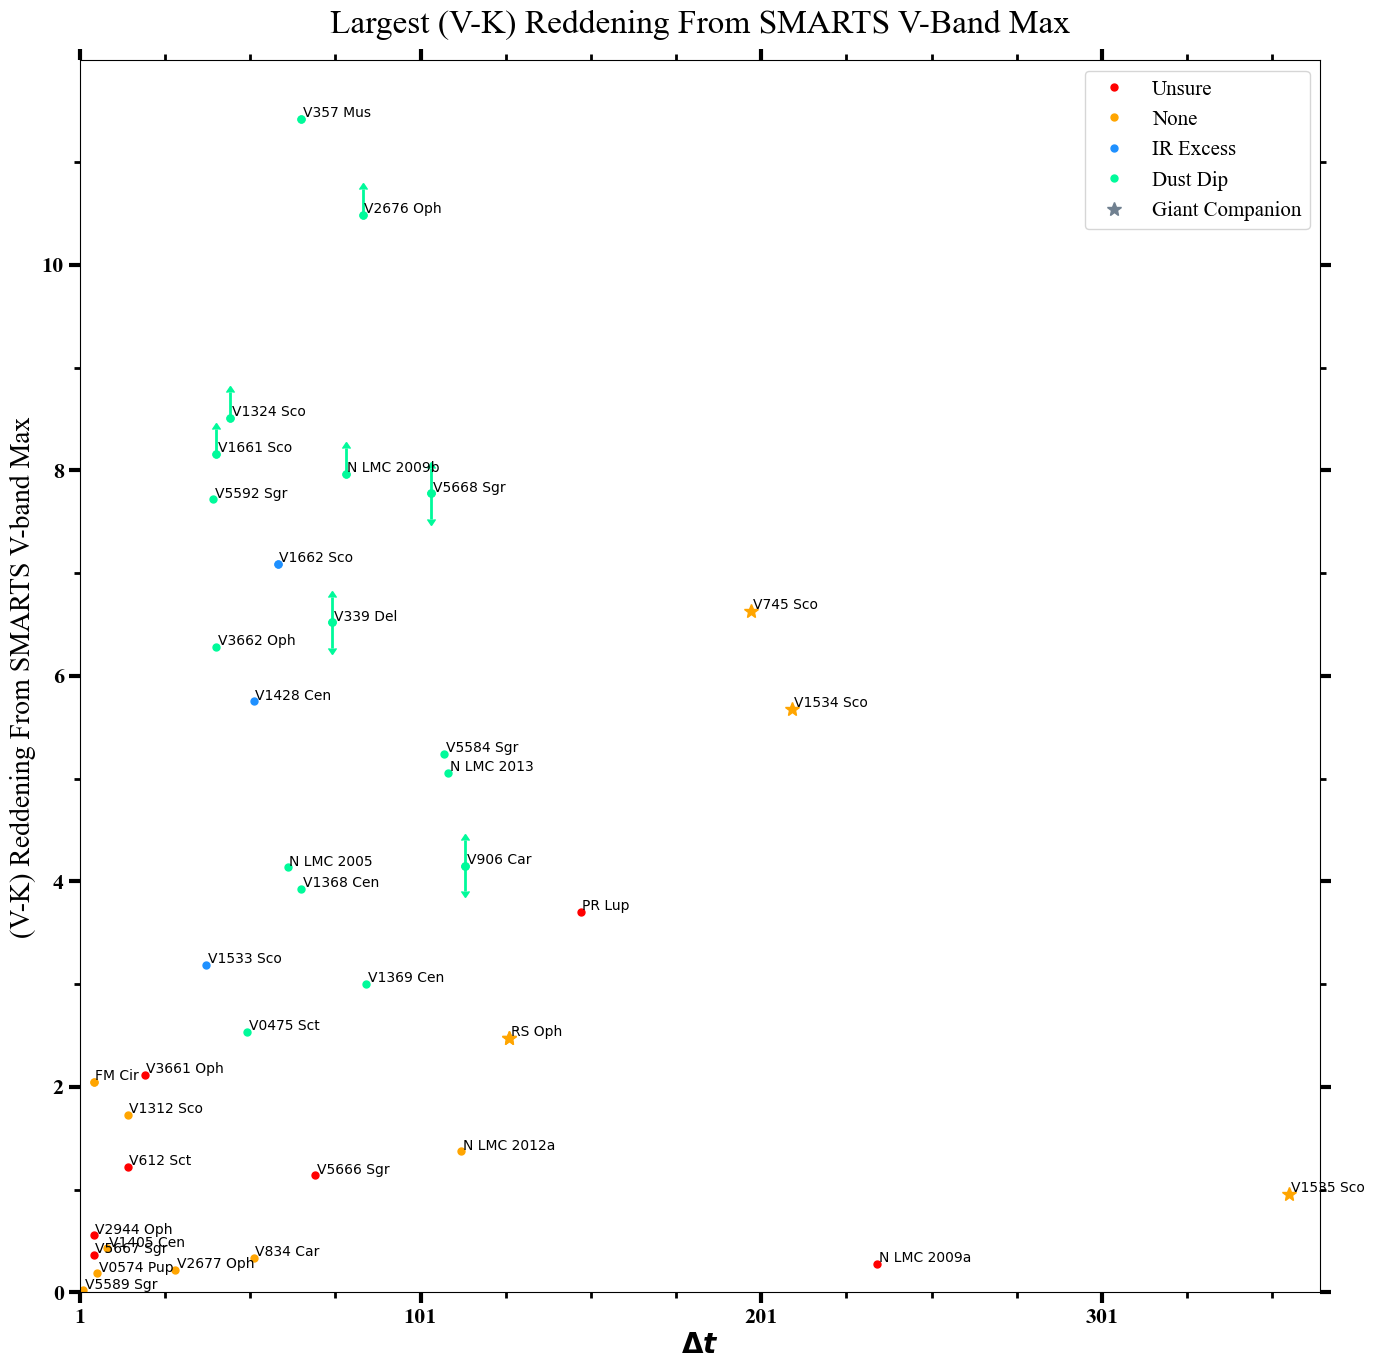

In [25]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
fig,(ax1)=plt.subplots(1,1,figsize=(16,16))
colorlist_short=['tab:olive','gold','r','orange','dodgerblue','mediumspringgreen']
for color,label in enumerate(['n/a','bad data','unsure','none','IR excess','dust dip']):
    if color!=0 and color!=1:
        features_dropped_day_change_from_vmax_temp=[]
        features_dropped_color_change_from_vmax_temp=[]
        features_dropped_name_temp=[]
        labelx=True
        labely=True
        for ii in np.where(np.asarray(features_labellist)==label)[0]:
            features_dropped_day_change_from_vmax_temp.append(np.asarray(features_dropped.loc[:,"day_change_from_vmax"])[ii])
            features_dropped_color_change_from_vmax_temp.append(np.asarray(features_dropped.loc[:,"color_change_from_vmax"])[ii])
            features_dropped_name_temp.append(features_dropped.index[ii])
            if Decent_Dust["Giant"][np.where(Decent_Dust["Name"]==features_dropped.index[ii])[0][0]]==0:
                markertemp='.' 
            else:
                markertemp='*'
                if labely==True:
                    label+=' (Giant)'
                    labelx=True
                    labely=False
            if np.asarray(features_dropped.loc[:,"upper"])[ii]==1.0:
                upper=True
                errtemp=0.25
            else:
                upper=False
                errtemp=None
            if np.asarray(features_dropped.loc[:,"lower"])[ii]==1.0:
                lower=True
                errtemp=0.25
            else:
                lower=False
                errtemp=None
            ax1.errorbar(np.asarray(features_dropped.loc[:,"day_change_from_vmax"])[ii],np.asarray(features_dropped.loc[:,"color_change_from_vmax"])[ii],yerr=None,color=colorlist_short[color],elinewidth=2,label=label if labelx==True else "",alpha=1,lw=0,marker=markertemp,markersize=10) #marker indicates giant companion
            labelx=False
            if lower==True:
                ax1.errorbar(np.asarray(features_dropped.loc[:,"day_change_from_vmax"])[ii],np.asarray(features_dropped.loc[:,"color_change_from_vmax"])[ii],yerr=errtemp,lolims=lower,color=colorlist_short[color],elinewidth=2,label=label if labelx==True else "",alpha=1,lw=0,marker=markertemp,markersize=10) #marker indicates giant companion
            if upper==True:
                ax1.errorbar(np.asarray(features_dropped.loc[:,"day_change_from_vmax"])[ii],np.asarray(features_dropped.loc[:,"color_change_from_vmax"])[ii],yerr=errtemp,uplims=upper,color=colorlist_short[color],elinewidth=2,label=label if labelx==True else "",alpha=1,lw=0,marker=markertemp,markersize=10) #marker indicates giant companion
        for i,txt in enumerate(features_dropped_name_temp):
            note=Decent_Dust["Official"][np.where(Decent_Dust["Name"]==txt)[0][0]]
            # if Decent_Dust["Giant"][np.where(Decent_Dust["Name"]==txt)[0][0]]==1:
            #     note+=" (G)"
            ax1.annotate(note,(features_dropped_day_change_from_vmax_temp[i]+0.5,features_dropped_color_change_from_vmax_temp[i]+0.02),font={'family':'DejaVu Sans','weight':'normal','size':10})
x1,x2=ax1.get_xlim()
y1,y2=ax1.get_ylim()
y1=0
x1,x2=1,365
ax1.set_xlim(x1,x2)
ax1.set_ylim(y1,y2)
ax1.set_xticks(np.arange(x1,x2,100))
ax1.set_xticks(np.arange(x1,x2,25),minor=True)
ax1.set_yticks(np.arange(np.floor(y1),np.floor(y2)+1,1),minor=True)
ax1.set_yticks(np.arange(np.floor(y1),np.floor(y2)+1,2))
ax1.tick_params(which='major',top=True,bottom=True,left=True,right=True,width=3,length=8)
ax1.tick_params(which='minor',top=True,bottom=True,left=True,right=True,width=2,length=4)
#ax1.set_xscale("log")
legend_elements=[Line2D([0],[0],linewidth=0,marker='.',color='r',label='Unsure',
                          markersize=10),
                Line2D([0],[0],linewidth=0,marker='.',color='orange',label='None',
                          markersize=10),
                Line2D([0],[0],linewidth=0,marker='.',color='dodgerblue',label='IR Excess',
                          markersize=10),
                Line2D([0],[0],linewidth=0,marker='.',color='mediumspringgreen',label='Dust Dip',
                          markersize=10),
                Line2D([0],[0],linewidth=0,marker='*',color='slategrey',label='Giant Companion',
                          markersize=10)]
ax1.legend(handles=legend_elements,prop={'size':15,'weight':'normal'})
ax1.set_xlabel(r'$\Delta t$')
ax1.set_ylabel('(V-K) Reddening From SMARTS V-band Max')
ax1.set_title('Largest (V-K) Reddening From SMARTS V-Band Max',pad=20)
plt.savefig('Color_Change_From_VBand_Max_no_annote.pdf',transparent=False)

In [26]:
features_dropped

,geq_20,mag_range,biggest_change,color_change_from_vmax,day_change_from_vmax,recurrent,category,vband_change_over_interval,kband_change_over_interval,Vpeak,t2,peak_dt,peak_dm,peak_dm_err,peakColor,upper,lower,start,start_err+,start_err-,bottom,bottom_err+,bottom_err-
FM Cir,1,1.11320,2.2380,2.050000,5.0,0,0,2.306,0.376,8.513,150.0,57.373,1.057339,1.271488,Extinction,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
N Cen 2012b,1,6.28270,9.5450,5.752000,52.0,0,1,5.134,0.029,15.485,11.0,58.001,4.786339,1.133488,Extinction,NaN,NaN,22.0,0.0,0.0,60.0,0.0,0.0
N Cen 2017,1,1.39960,2.3550,0.429000,9.0,0,0,0.638,0.580,11.576,110.0,17.580,2.066339,1.411488,Extinction,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
N LMC 2005,1,-4.08800,-5.4395,4.135667,62.0,0,2,1.777,-2.002,13.464,63.0,110.009,4.248000,0.000000,Full,NaN,NaN,90.0,0.0,0.0,130.0,0.0,0.0
N LMC 2009a,1,-1.53585,-2.8660,0.277000,235.0,0,-1,5.717,5.006,15.799,5.0,241.567,1.139339,0.810488,Extinction,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
N LMC 2009b,1,-5.49500,-7.9630,7.963000,79.0,0,2,2.015,-1.160,12.601,5.0,79.000,7.963000,0.000000,None,NaN,1.0,50.0,0.0,0.0,90.0,0.0,0.0
N LMC 2012a,1,-2.64975,-4.6070,1.373000,113.0,0,0,6.355,8.161,18.054,2.0,113.000,1.373000,0.000000,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
N LMC 2013,1,-4.69850,-5.1120,5.059000,109.0,0,2,4.870,-0.115,14.722,52.0,123.209,4.940339,0.811488,Extinction,NaN,NaN,40.0,0.0,0.0,85.0,0.0,0.0
N Mus 2018,1,-10.68545,-11.4170,11.417000,66.0,0,2,11.516,0.492,10.590,40.0,66.930,11.292000,0.215000,Full,1.0,NaN,45.0,0.0,0.0,90.0,0.0,0.0
N Oph 2017,1,6.05650,7.1040,6.283000,41.0,0,2,4.732,-1.281,18.022,43.0,41.000,6.283000,0.000000,None,NaN,NaN,25.0,0.0,0.0,44.0,0.0,0.0
